# Online News Popularity- A Classification Problem

### Importing all the required libraries

In [166]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn import metrics

### Loading Data

In [167]:
#Loading data
onlinenews = pd.read_csv("C:/Users/sanch/Downloads/online+news+popularity (1)/OnlineNewsPopularity/OnlineNewsPopularity.csv")


for col in onlinenews.columns:
    onlinenews.rename(columns={col:col.replace(" ", "")},inplace=True)


onlinenews.head(20)

url  timedelta  \
0   http://mashable.com/2013/01/07/amazon-instant-...      731.0   
1   http://mashable.com/2013/01/07/ap-samsung-spon...      731.0   
2   http://mashable.com/2013/01/07/apple-40-billio...      731.0   
3   http://mashable.com/2013/01/07/astronaut-notre...      731.0   
4    http://mashable.com/2013/01/07/att-u-verse-apps/      731.0   
5    http://mashable.com/2013/01/07/beewi-smart-toys/      731.0   
6   http://mashable.com/2013/01/07/bodymedia-armba...      731.0   
7    http://mashable.com/2013/01/07/canon-poweshot-n/      731.0   
8   http://mashable.com/2013/01/07/car-of-the-futu...      731.0   
9   http://mashable.com/2013/01/07/chuck-hagel-web...      731.0   
10  http://mashable.com/2013/01/07/cosmic-events-d...      731.0   
11   http://mashable.com/2013/01/07/crayon-creatures/      731.0   
12      http://mashable.com/2013/01/07/creature-cups/      731.0   
13          http://mashable.com/2013/01/07/dad-jokes/      731.0   
14  http://mashable.com/2013/01/07/downton-abbey-t...      731.0   
15  http://mashable.com/2013/01/07/earth-size-plan...      731.0   
16          http://mashable.com/2013/01/07/echo-game/      731.0   
17  http://mashable.com/2013/01/07/entrepreneur-tr...      731.0   
18  http://mashable.com/2013/01/07/facebook-sick-app/      731.0   
19  http://mashable.com/2013/01/07/felt-audio-puls...      731.0   

    n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0             12.0             219.0         0.663594               1.0   
1              9.0             255.0         0.604743               1.0   
2              9.0             211.0         0.575130               1.0   
3              9.0             531.0         0.503788               1.0   
4             13.0            1072.0         0.415646               1.0   
5             10.0             370.0         0.559889               1.0   
6              8.0             960.0         0.418163               1.0   
7             12.0             989.0         0.433574               1.0   
8             11.0              97.0         0.670103               1.0   
9             10.0             231.0         0.636364               1.0   
10             9.0            1248.0         0.490050               1.0   
11            10.0             187.0         0.666667               1.0   
12             9.0             274.0         0.609195               1.0   
13             9.0             285.0         0.744186               1.0   
14             8.0             259.0         0.562753               1.0   
15            12.0             682.0         0.459542               1.0   
16             8.0            1118.0         0.512397               1.0   
17             8.0             397.0         0.624679               1.0   
18            11.0             103.0         0.689320               1.0   
19             8.0            1207.0         0.410579               1.0   

    n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  ...  \
0                   0.815385        4.0             2.0       1.0  ...   
1                   0.791946        3.0             1.0       1.0  ...   
2                   0.663866        3.0             1.0       1.0  ...   
3                   0.665635        9.0             0.0       1.0  ...   
4                   0.540890       19.0            19.0      20.0  ...   
5                   0.698198        2.0             2.0       0.0  ...   
6                   0.549834       21.0            20.0      20.0  ...   
7                   0.572108       20.0            20.0      20.0  ...   
8                   0.836735        2.0             0.0       0.0  ...   
9                   0.797101        4.0             1.0       1.0  ...   
10                  0.731638       11.0             0.0       1.0  ...   
11                  0.800000        7.0             0.0       1.0  ...   
12                  0.707602       18.0             2.0      11.0  ...   
13       

### Describing data to find out statistical information

In [168]:
onlinenews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            39644 non-null  object 
 1   timedelta                      39644 non-null  float64
 2   n_tokens_title                 39644 non-null  float64
 3   n_tokens_content               39644 non-null  float64
 4   n_unique_tokens                39644 non-null  float64
 5   n_non_stop_words               39644 non-null  float64
 6   n_non_stop_unique_tokens       39644 non-null  float64
 7   num_hrefs                      39644 non-null  float64
 8   num_self_hrefs                 39644 non-null  float64
 9   num_imgs                       39644 non-null  float64
 10  num_videos                     39644 non-null  float64
 11  average_token_length           39644 non-null  float64
 12  num_keywords                   39644 non-null 

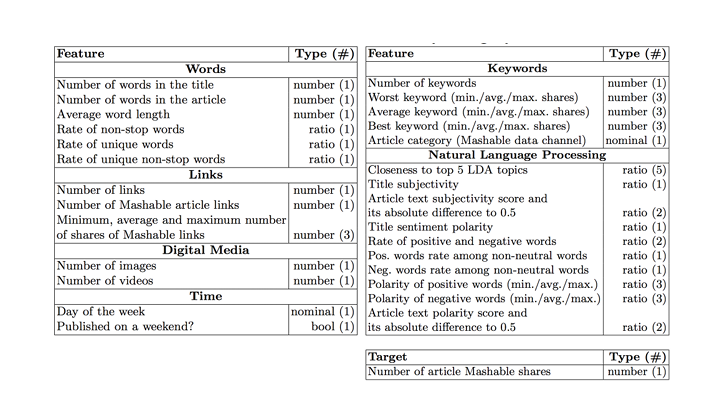

In [169]:
from PIL import Image

# Open an image file
image = Image.open("C:/Users/sanch/Pictures/Screenshots/Screenshot 2023-11-01 193135.png")  # Replace "your_image_file.jpg" with the actual image file path

# Display the image
display(image)

In [170]:
onlinenews.describe()

timedelta  n_tokens_title  n_tokens_content  n_unique_tokens  \
count  39644.000000    39644.000000      39644.000000     39644.000000   
mean     354.530471       10.398749        546.514731         0.548216   
std      214.163767        2.114037        471.107508         3.520708   
min        8.000000        2.000000          0.000000         0.000000   
25%      164.000000        9.000000        246.000000         0.470870   
50%      339.000000       10.000000        409.000000         0.539226   
75%      542.000000       12.000000        716.000000         0.608696   
max      731.000000       23.000000       8474.000000       701.000000   

       n_non_stop_words  n_non_stop_unique_tokens     num_hrefs  \
count      39644.000000              39644.000000  39644.000000   
mean           0.996469                  0.689175     10.883690   
std            5.231231                  3.264816     11.332017   
min            0.000000                  0.000000      0.000000   
25%            1.000000                  0.625739      4.000000   
50%            1.000000                  0.690476      8.000000   
75%            1.000000                  0.754630     14.000000   
max         1042.000000                650.000000    304.000000   

       num_self_hrefs      num_imgs    num_videos  ...  min_positive_polarity  \
count    39644.000000  39644.000000  39644.000000  ...           39644.000000   
mean         3.293638      4.544143      1.249874  ...               0.095446   
std          3.855141      8.309434      4.107855  ...               0.071315   
min          0.000000      0.000000      0.000000  ...               0.000000   
25%          1.000000      1.000000      0.000000  ...               0.050000   
50%          3.000000      1.000000      0.000000  ...               0.100000   
75%          4.000000      4.000000      1.000000  ...               0.100000   
max        116.000000    128.000000     91.000000  ...               1.000000   

       max_positive_polarity  avg_negative_polarity  min_negative_polarity  \
count           39644.000000           39644.000000           39644.000000   
mean                0.756728              -0.259524              -0.521944   
std                 0.247786               0.127726               0.290290   
min                 0.000000              -1.000000              -1.000000   
25%                 0.600000              -0.328383              -0.700000   
50%                 0.800000              -0.253333              -0.500000   
75%                 1.000000              -0.186905              -0.300000   
max                 1.000000               0.000000               0.000000   

       max_negative_polarity  title_subjectivity  title_sentiment_polarity  \
count           39644.000000        39644.000000              39644.000000   
mean               -0.107500            0.282353                  0.071425   
std                 0.095373            0.324247                  0.265450   
min                -1.000000            0.000000                 -1.000000   
25%                -0.125000            0.000000                  0.000000   
50%                -0.100000            0.150000                  0.000000   
75%                -0.050000            0.500000                  0.150000   
max                 0.000000            1.000000                  1.000000   

       abs_title_subjectivity  abs_title_sentiment_polarity         shares  
count            39644.000000                  39644.000000   39644.000000  
mean                 0.341843                      0.156064    3395.380184  
std                  0.188791                      0.226294   11626.950749  
min                  0.000000                      0.000000       1.000000  
25%                  0.166667                      0.000000     946.000000  
50%                  0.500000                      0.000000    1400.000000  
75%                  0.500000                      0.250000    2

##### So median is 1400 for target variable .i.e shares, Means 50% of articles have less than 1400 shares.

## Visual Analysis of Dataset for handling outliers .
######## as it seems from summary i.e Data is varying on different scale

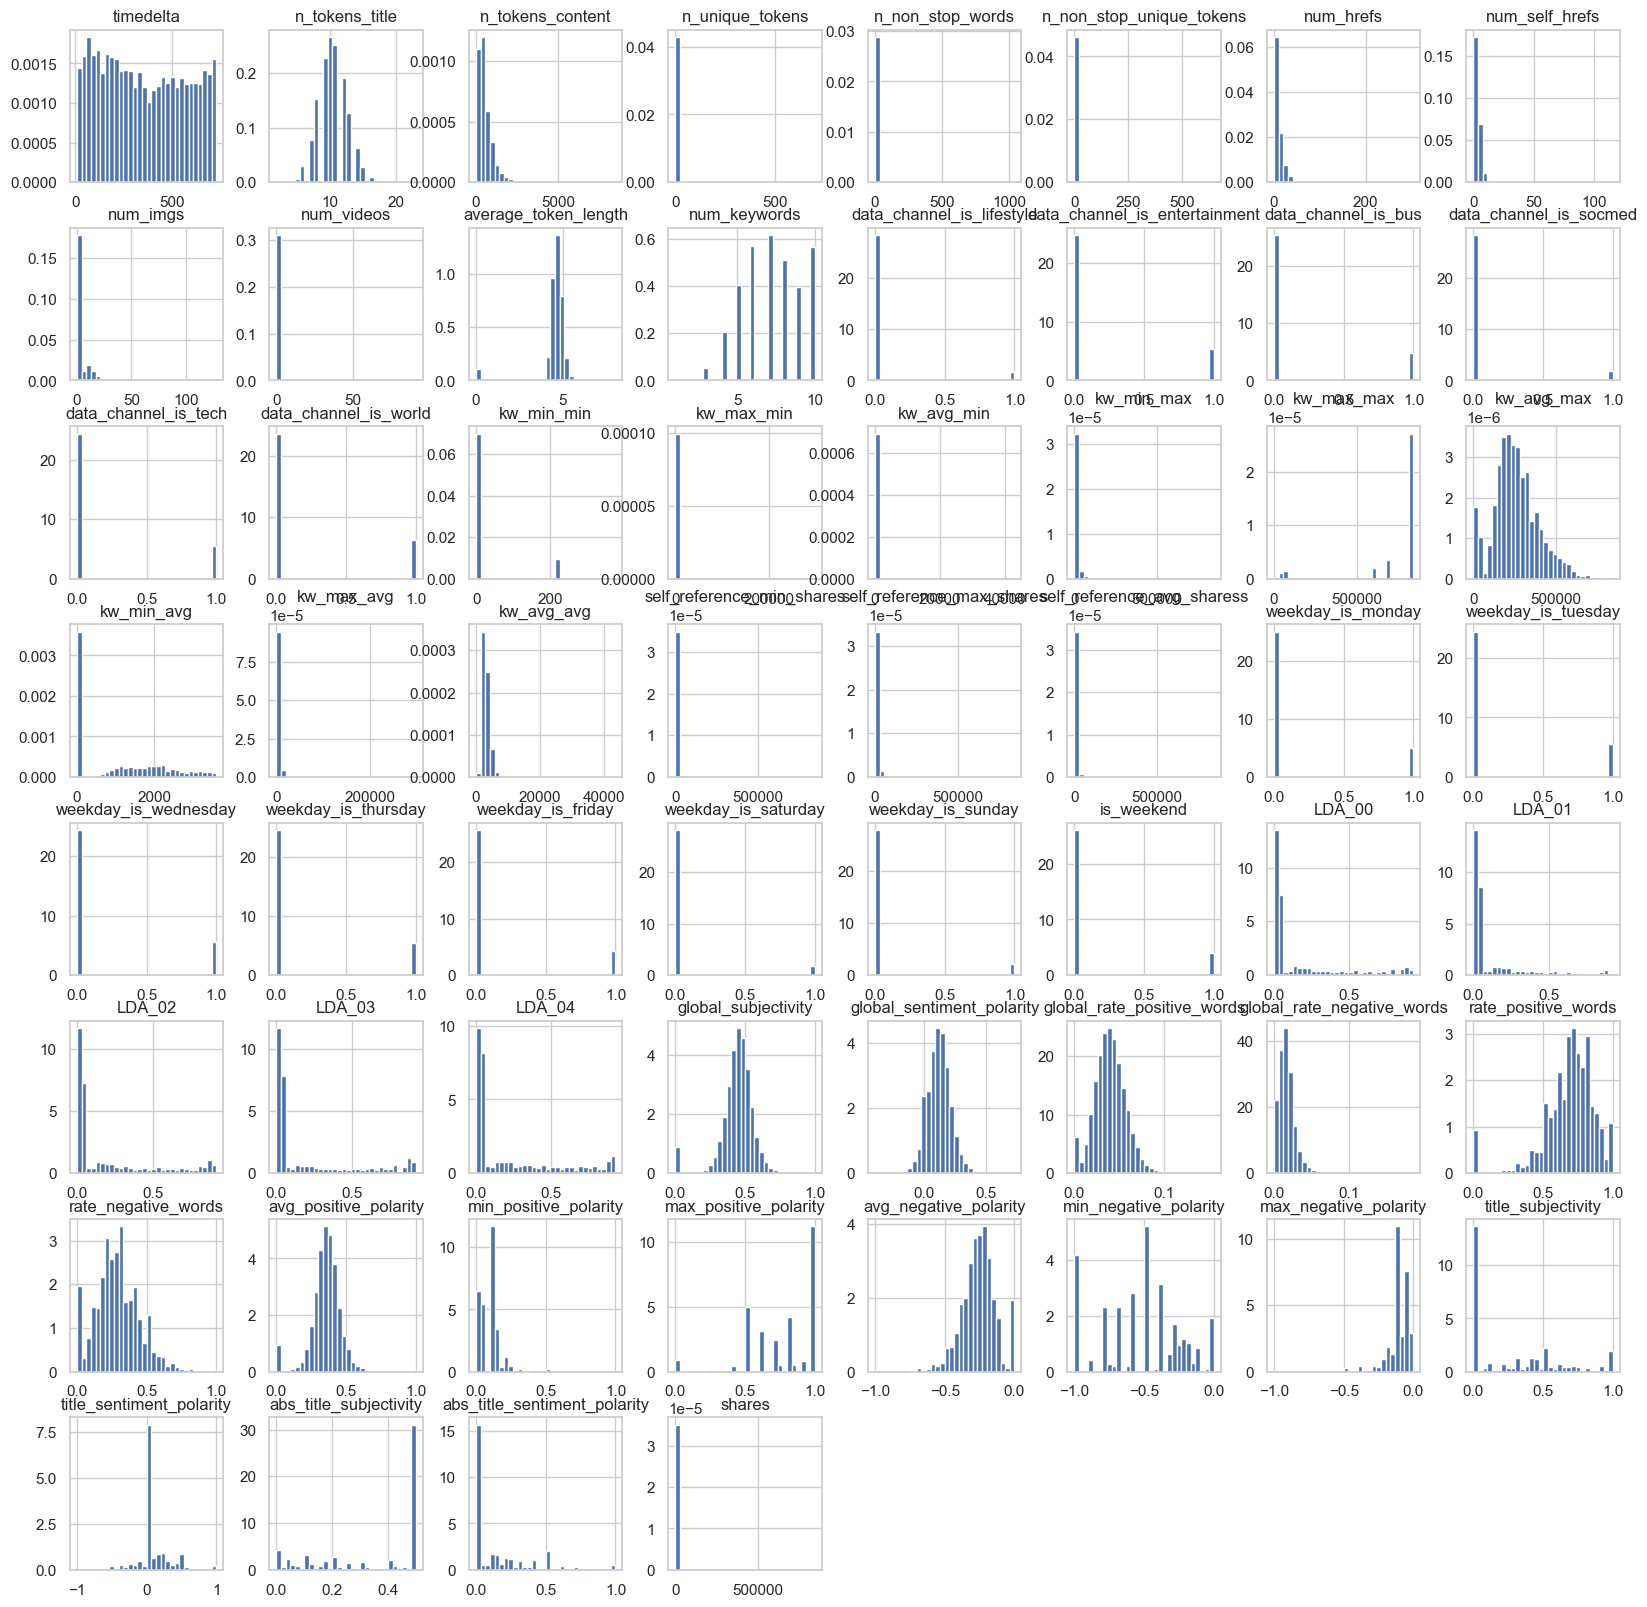

In [171]:
#Visualize the variable distribution with histograms

onlinenews.hist(bins=30, figsize=(20,20), density=True)
plt.show()

##### It is seen the that the distribution of the dataset is skewed and scales vary lot for different features

# Data Preprocessing and EDA

In [172]:
# Here we drop the two non-preditive (url and timedelta) attributes. 
onlinenews.drop(labels=['url','timedelta'], axis = 1, inplace=True)
onlinenews.head()

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0            12.0             219.0         0.663594               1.0   
1             9.0             255.0         0.604743               1.0   
2             9.0             211.0         0.575130               1.0   
3             9.0             531.0         0.503788               1.0   
4            13.0            1072.0         0.415646               1.0   

   n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  num_videos  \
0                  0.815385        4.0             2.0       1.0         0.0   
1                  0.791946        3.0             1.0       1.0         0.0   
2                  0.663866        3.0             1.0       1.0         0.0   
3                  0.665635        9.0             0.0       1.0         0.0   
4                  0.540890       19.0            19.0      20.0         0.0   

   average_token_length  ...  min_positive_polarity  max_positive_polarity  \
0              4.680365  ...               0.100000                    0.7   
1              4.913725  ...               0.033333                    0.7   
2              4.393365  ...               0.100000                    1.0   
3              4.404896  ...               0.136364                    0.8   
4              4.682836  ...               0.033333                    1.0   

   avg_negative_polarity  min_negative_polarity  max_negative_polarity  \
0              -0.350000                 -0.600              -0.200000   
1              -0.118750                 -0.125              -0.100000   
2              -0.466667                 -0.800              -0.133333   
3              -0.369697                 -0.600              -0.166667   
4              -0.220192                 -0.500              -0.050000   

   title_subjectivity  title_sentiment_polarity  abs_title_subjectivity  \
0            0.500000                 -0.187500                0.000000   
1            0.000000                  0.000000                0.500000   
2            0.000000                  0.000000                0.500000   
3            0.000000                  0.000000                0.500000   
4            0.454545                  0.136364                0.045455   

   abs_title_sentiment_polarity  shares  
0                      0.187500     593  
1                      0.000000     711  
2                      0.000000    1500  
3                      0.000000    1200  
4                      0.136364     505  

[5 rows x 59 columns]

In [173]:
cols_to_be_cleaned = onlinenews.columns[onlinenews.isnull().any()]
cols_to_be_cleaned

Index([], dtype='object')

# No missing values in Dataset! Lucky!

In [174]:
#onlinenews.shape
onlinenews=onlinenews.drop_duplicates() ##No Duplicates too
onlinenews.shape

(39644, 59)

# Visualizing the Predictor Variable

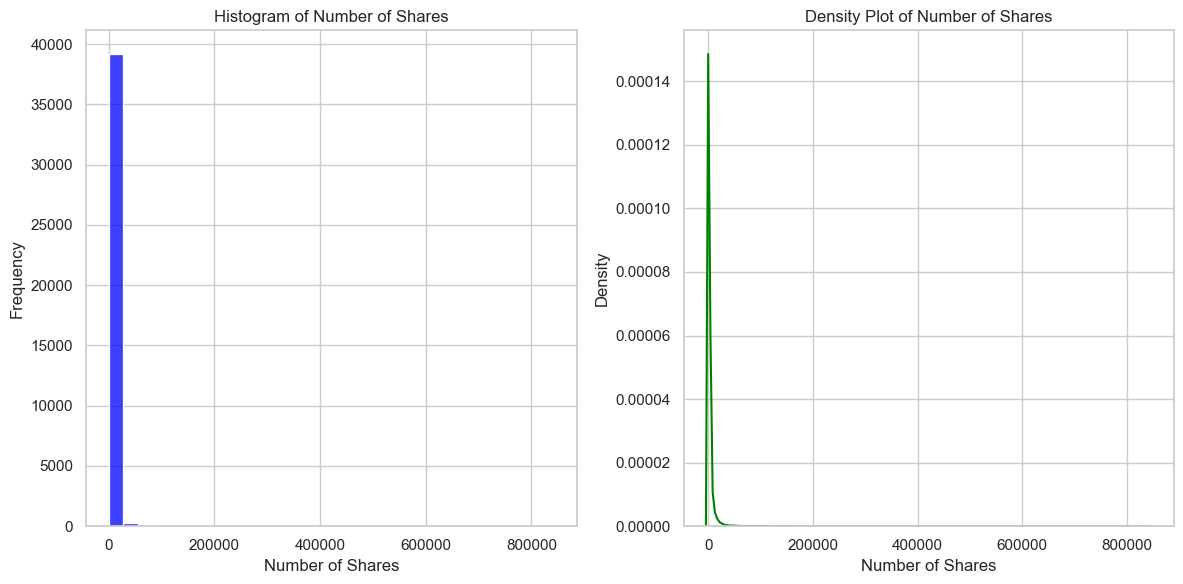

<Axes: >

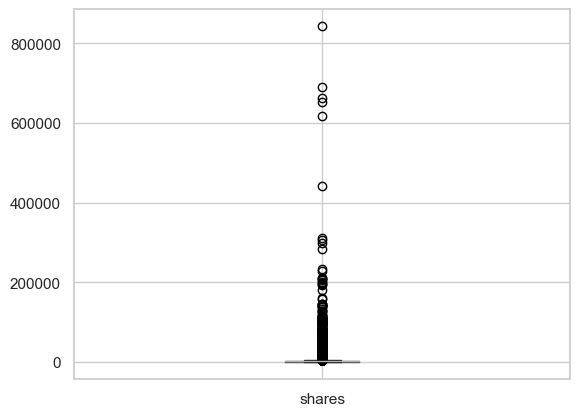

In [175]:
# Filtering data to show the histogram and density plot

import seaborn as sns

# Assuming you have loaded your dataset and have a DataFrame named 'data'
# If your target variable column is named 'shares', you can create the plots as follows:

# Create a figure with two subplots
plt.figure(figsize=(12, 6))

# Plot a histogram of the number of shares
plt.subplot(1, 2, 1)
sns.histplot(onlinenews['shares'], bins=30, kde=False, color='blue')
#plt.xticks([0,100,1000,5000,10000,20000,30000,50000,100000,500000])
plt.title("Histogram of Number of Shares")
plt.xlabel("Number of Shares")
plt.ylabel("Frequency")

# Plot the density plot of the number of shares
plt.subplot(1, 2, 2)
sns.kdeplot(onlinenews['shares'], color='green')
#plt.xticks([0,100,1000,5000,10000])
plt.title("Density Plot of Number of Shares")
plt.xlabel("Number of Shares")
plt.ylabel("Density")

# Show the plots witth
plt.tight_layout()
#plt.xticks([0,100,1000,5000,10000,20000,30000,50000,100000,500000])
plt.show()

#Understanding target variable distribution
onlinenews.boxplot(column='shares')

Skewness: 33.963885
Kurtosis: 1832.672657


C:\Users\sanch\AppData\Local\Temp\ipykernel_52092\204016908.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(onlinenews['shares'], fit=norm);


"\n'Shares' doesn't have a normal distribution. It shows 'peakedness', positive skewness and does not follow the diagonal line.\nThus some statistic analysis might not be suitable for it"

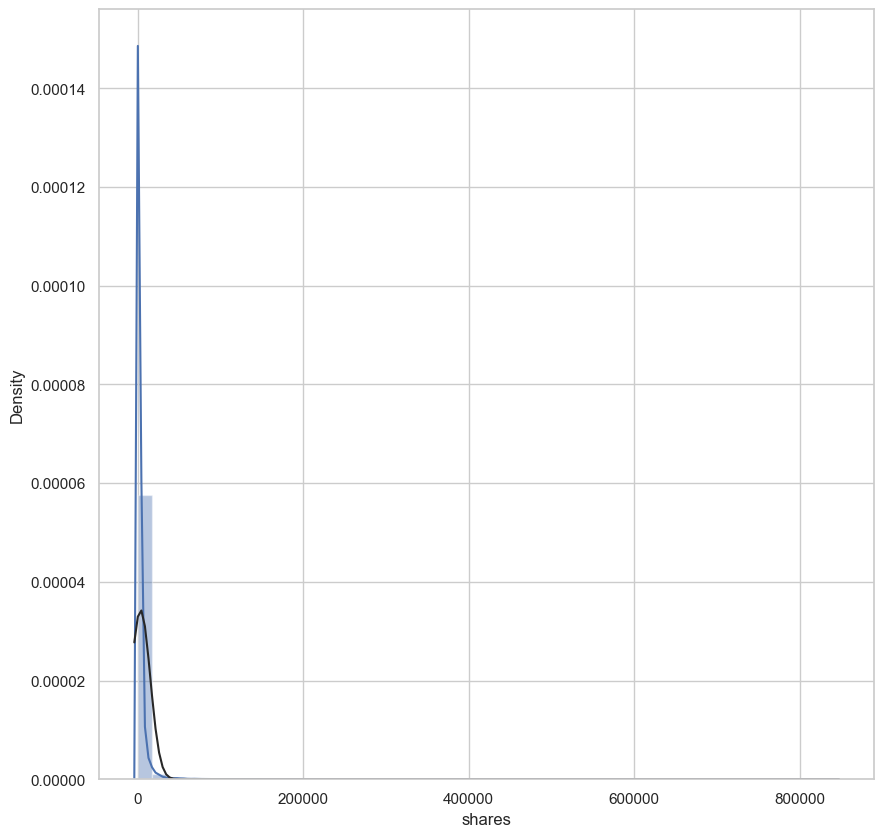

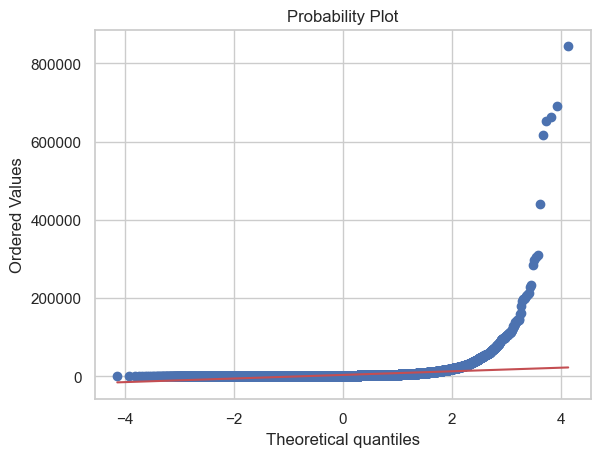

In [176]:
print("Skewness: %f" % onlinenews['shares'].skew())
print("Kurtosis: %f" % onlinenews['shares'].kurt())

from scipy.stats import norm, probplot

#histogram and normal probability plot
temp_data = onlinenews[onlinenews['shares'] <= 100000]
fig,ax = plt.subplots(figsize=(10,10))
sns.distplot(onlinenews['shares'], fit=norm);
fig = plt.figure()
res = probplot(onlinenews['shares'], plot=plt)

'''
'Shares' doesn't have a normal distribution. It shows 'peakedness', positive skewness and does not follow the diagonal line.
Thus some statistic analysis might not be suitable for it'''

### So clearly from all the visualization and summary statistics of the dataset we can see that we need scaling and there are some outliers too


# Doing LOG TRANSFORMATION:

In [177]:
# Add 1 to shift the data to the range (0, 2)
shifted_data = onlinenews + 1

# Apply the log transformation to the shifted data
log_transformed_data = np.log(shifted_data)

C:\Users\sanch\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


In [178]:
log_transformed_data.describe()

C:\Users\sanch\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4573: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
count    39644.000000      39644.000000     39644.000000      39644.000000   
mean         2.415743          5.889971         0.421251          0.672656   
std          0.190899          1.255442         0.103151          0.121986   
min          1.098612          0.000000         0.000000          0.000000   
25%          2.302585          5.509388         0.385854          0.693147   
50%          2.397895          6.016157         0.431279          0.693147   
75%          2.564949          6.575076         0.475424          0.693147   
max          3.178054          9.044876         6.553933          6.949856   

       n_non_stop_unique_tokens     num_hrefs  num_self_hrefs      num_imgs  \
count              39644.000000  39644.000000    39644.000000  39644.000000   
mean                   0.509477      2.156564        1.208878      1.116427   
std                    0.111410      0.809445        0.692698      0.973755   
min                    0.000000      0.000000        0.000000      0.000000   
25%                    0.485963      1.609438        0.693147      0.693147   
50%                    0.525010      2.197225        1.386294      0.693147   
75%                    0.562258      2.708050        1.609438      1.609438   
max                    6.478510      5.720312        4.762174      4.859812   

         num_videos  average_token_length  ...  min_positive_polarity  \
count  39644.000000          39644.000000  ...           39644.000000   
mean       0.400420              1.685367  ...               0.089255   
std        0.680486              0.299298  ...               0.060260   
min        0.000000              0.000000  ...               0.000000   
25%        0.000000              1.700814  ...               0.048790   
50%        0.000000              1.734145  ...               0.095310   
75%        0.693147              1.767268  ...               0.095310   
max        4.521789              2.201829  ...               0.693147   

       max_positive_polarity  avg_negative_polarity  min_negative_polarity  \
count           39644.000000           3.964400e+04           3.964400e+04   
mean                0.552108                   -inf                   -inf   
std                 0.156259                    NaN                    NaN   
min                 0.000000                   -inf                   -inf   
25%                 0.470004          -3.980664e-01          -1.203973e+00   
50%                 0.587787          -2.921364e-01          -6.931472e-01   
75%                 0.693147          -2.069070e-01          -3.566749e-01   
max                 0.693147           0.000000e+00           0.000000e+00   

       max_negative_polarity  title_subjectivity  title_sentiment_polarity  \
count           3.964400e+04        39644.000000              3.964400e+04   
mean                    -inf            0.219199                      -inf   
std                      NaN            0.238195                       NaN   
min                     -inf            0.000000                      -inf   
25%            -1.335314e-01            0.000000              0.000000e+00   
50%            -1.053605e-01            0.139762              0.000000e+00   
75%            -5.129329e-02            0.405465              1.397619e-01   
max             0.000000e+00            0.693147              6.931472e-01   

       abs_title_subjectivity  abs_title_sentiment_polarity        shares  
count            39644.000000                  39644.000000  39644.000000  
mean                 0.283368                      0.128709      7.475692  
std                  0.148888                      0.173844      0.929674  
min                  0.000000                      0.000000      0.693147  
25%                  0.154151                      0.000000      6.853299  
50%                  0.405465                      0.000000      7.24494

# Checking Multi-Collinearity

Text(0.5, 1.0, 'Correlation Matrix (Online News)')

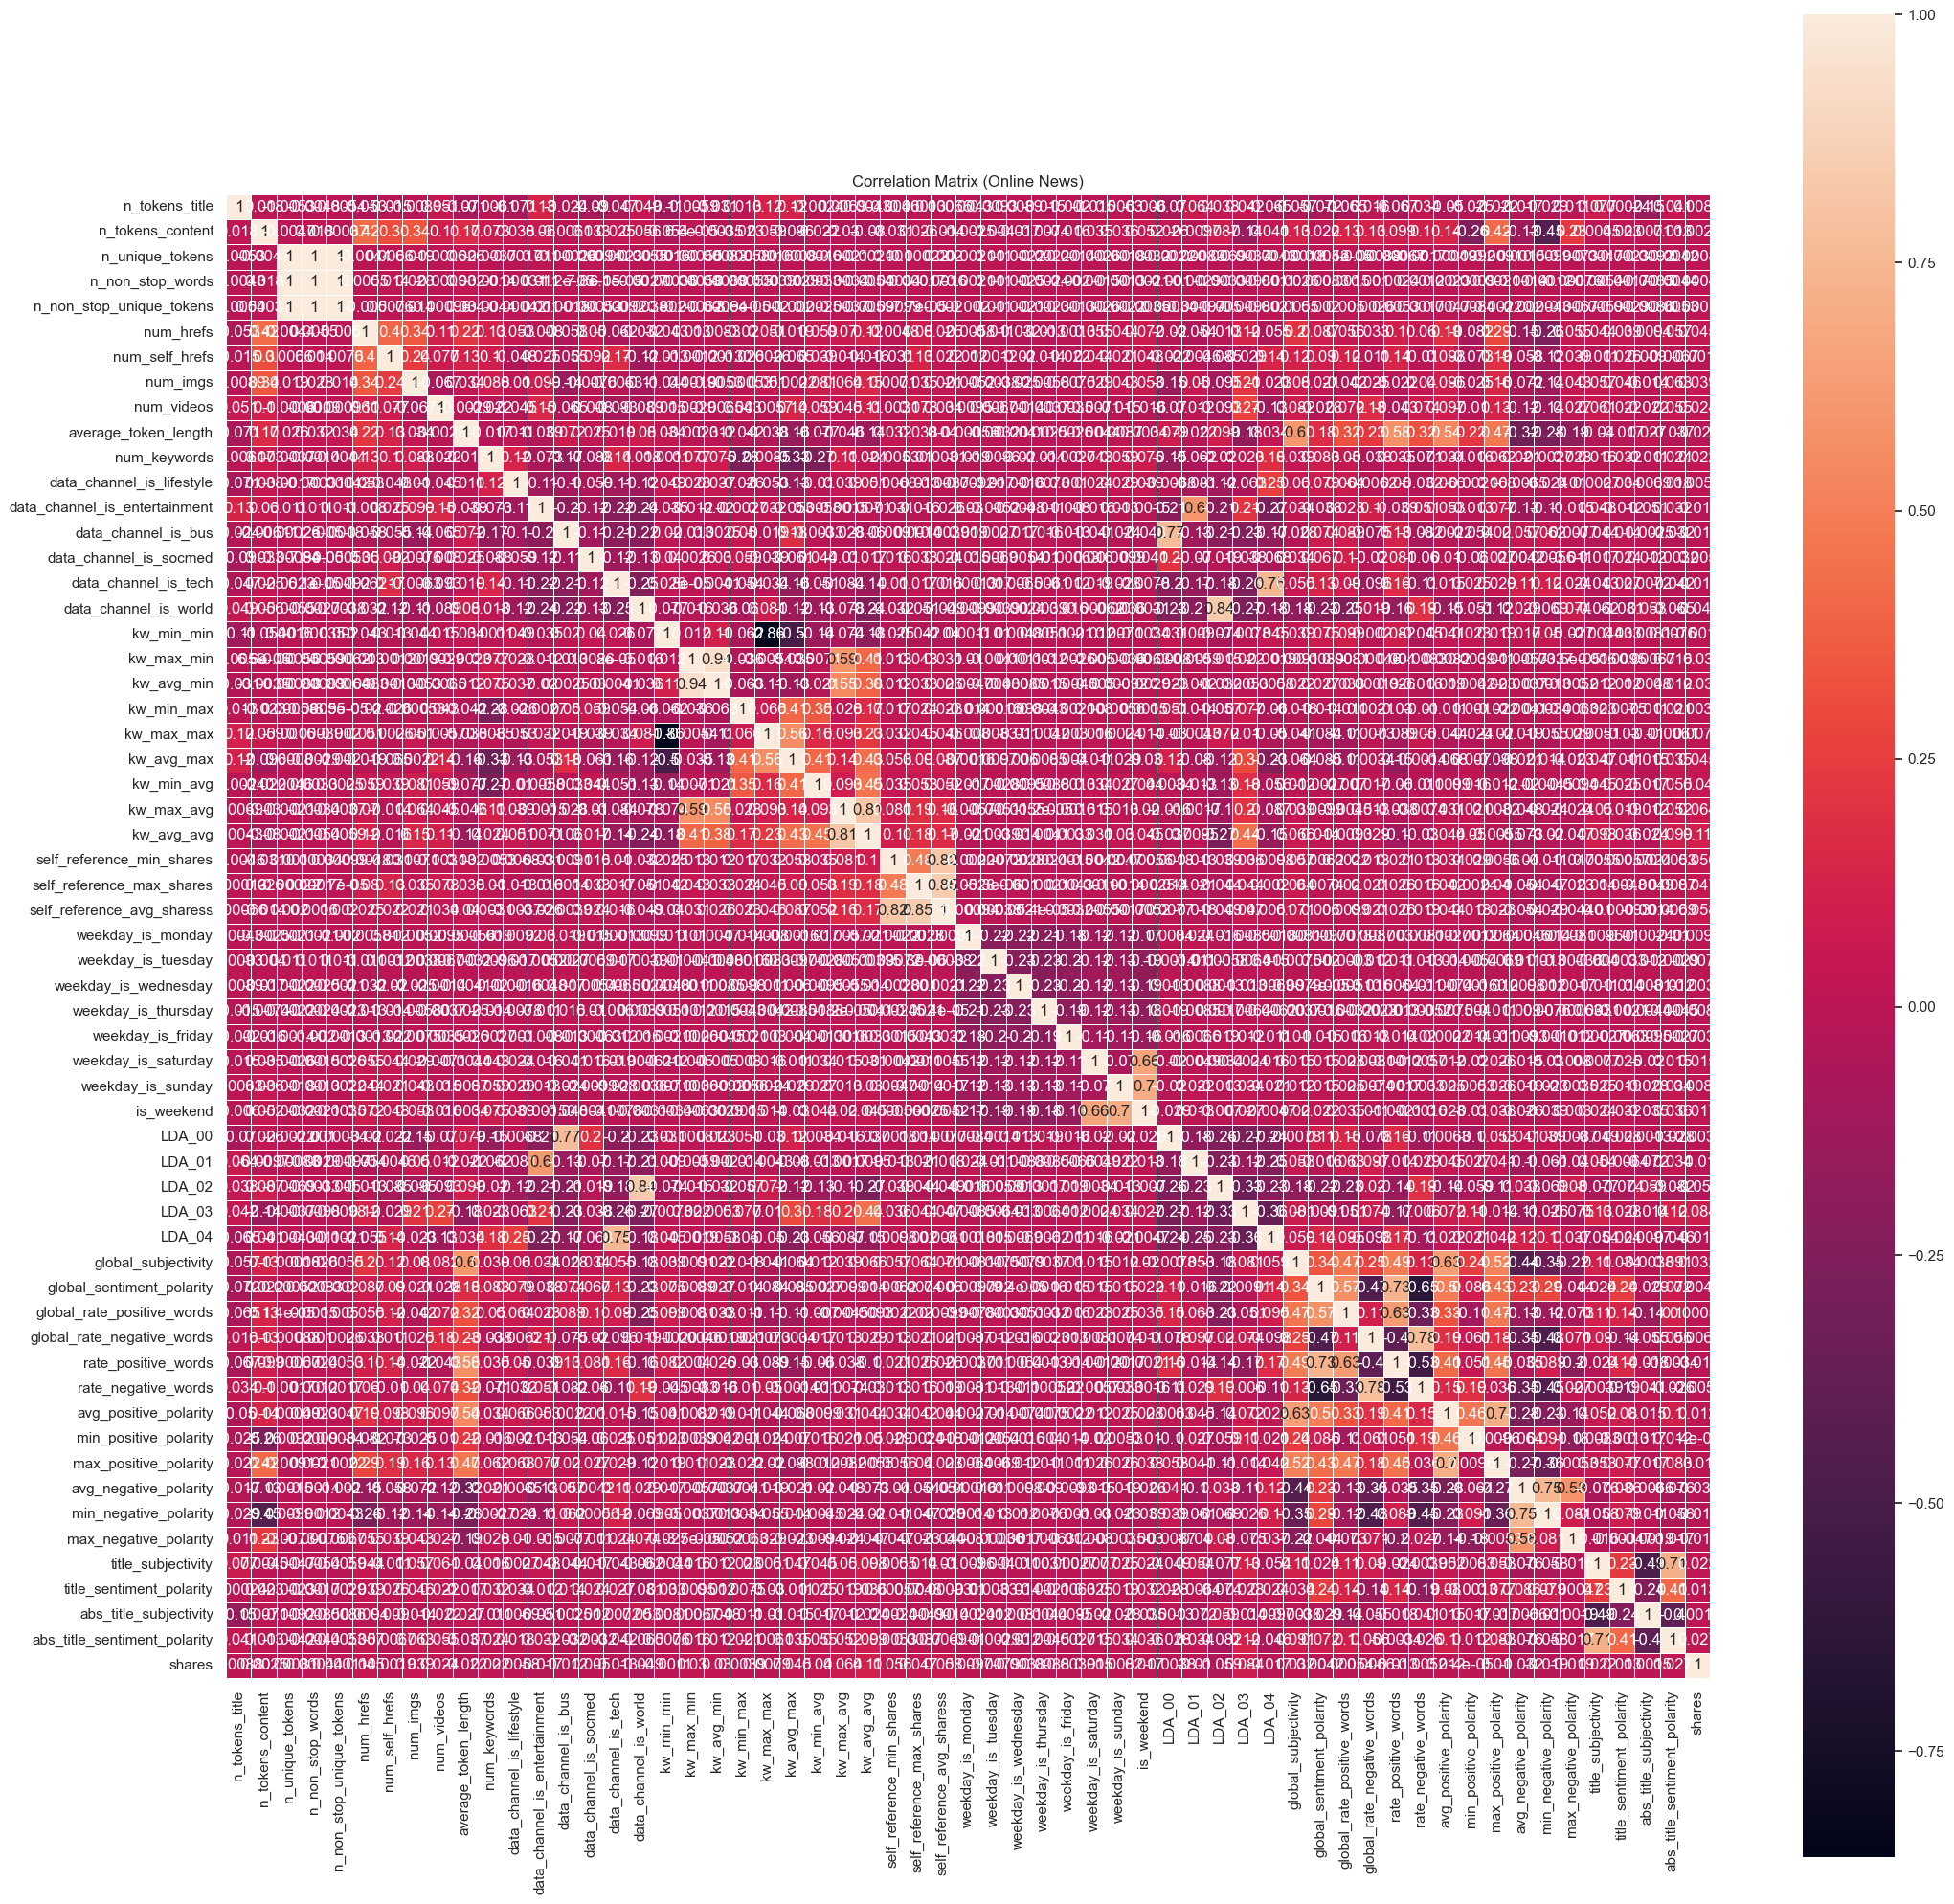

In [179]:
correlation = onlinenews.corr()

plt.figure(figsize=(25,25))
sns.heatmap(correlation, square=True, annot=True, linewidths=.5)
plt.title("Correlation Matrix (Online News)")

#From the correlation above, we can see that multicollinearity is less ,so no need to drop only few columns

In [180]:
onlinenews.head(10)
#From the correlation above, we can see that multicollinearity is less ,so no need to drop any columns based on it

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0            12.0             219.0         0.663594               1.0   
1             9.0             255.0         0.604743               1.0   
2             9.0             211.0         0.575130               1.0   
3             9.0             531.0         0.503788               1.0   
4            13.0            1072.0         0.415646               1.0   
5            10.0             370.0         0.559889               1.0   
6             8.0             960.0         0.418163               1.0   
7            12.0             989.0         0.433574               1.0   
8            11.0              97.0         0.670103               1.0   
9            10.0             231.0         0.636364               1.0   

   n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  num_videos  \
0                  0.815385        4.0             2.0       1.0         0.0   
1                  0.791946        3.0             1.0       1.0         0.0   
2                  0.663866        3.0             1.0       1.0         0.0   
3                  0.665635        9.0             0.0       1.0         0.0   
4                  0.540890       19.0            19.0      20.0         0.0   
5                  0.698198        2.0             2.0       0.0         0.0   
6                  0.549834       21.0            20.0      20.0         0.0   
7                  0.572108       20.0            20.0      20.0         0.0   
8                  0.836735        2.0             0.0       0.0         0.0   
9                  0.797101        4.0             1.0       1.0         1.0   

   average_token_length  ...  min_positive_polarity  max_positive_polarity  \
0              4.680365  ...               0.100000                    0.7   
1              4.913725  ...               0.033333                    0.7   
2              4.393365  ...               0.100000                    1.0   
3              4.404896  ...               0.136364                    0.8   
4              4.682836  ...               0.033333                    1.0   
5              4.359459  ...               0.136364                    0.6   
6              4.654167  ...               0.100000                    1.0   
7              4.617796  ...               0.100000                    1.0   
8              4.855670  ...               0.400000                    0.8   
9              5.090909  ...               0.100000                    0.5   

   avg_negative_polarity  min_negative_polarity  max_negative_polarity  \
0              -0.350000                 -0.600              -0.200000   
1              -0.118750                 -0.125              -0.100000   
2              -0.466667                 -0.800              -0.133333   
3              -0.369697                 -0.600              -0.166667   
4              -0.220192                 -0.500              -0.050000   
5              -0.195000                 -0.400              -0.100000   
6              -0.224479                 -0.500              -0.050000   
7              -0.242778                 -0.500              -0.050000   
8              -0.125000                 -0.125              -0.125000   
9              -0.238095                 -0.500              -0.100000   

   title_subjectivity  title_sentiment_polarity  abs_title_subjectivity  \
0            0.500000                 -0.187500                0.000000   
1            0.000000                  0.000000                0.500000   
2            0.000000                  0.000000                0.500000   
3            0.000000                  0.000000                0.500000   
4            0.454545                  0.136364                0.045455   
5            0.642857                  0.214286                0.142857   
6            0.000000                  0.000000                0.500000   
7            1.000000            

In [181]:
# Select upper triangle of correlation matrix
correlation = onlinenews.corr().abs()
upper = correlation.where(np.triu(np.ones(correlation.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > .90)]

print(to_drop)

['n_non_stop_words', 'n_non_stop_unique_tokens', 'kw_avg_min']


##### We decided to see if we have any collinearity problems. We examined the correlation coefficient 
among all pairs of variables and found that there is high correlation (close to 1) among n_unique_tokens,
n_non_stop_words and n_non_stop_unique_tokens, so we kept only n_unique_tokens. We also noticed that 
kw_avg_avg has the strongest correlation with shares, so we decided that kw_avg_avg must be included in our model.
Although Not dropping Anything Yet, will decide after doing Feature Engineering

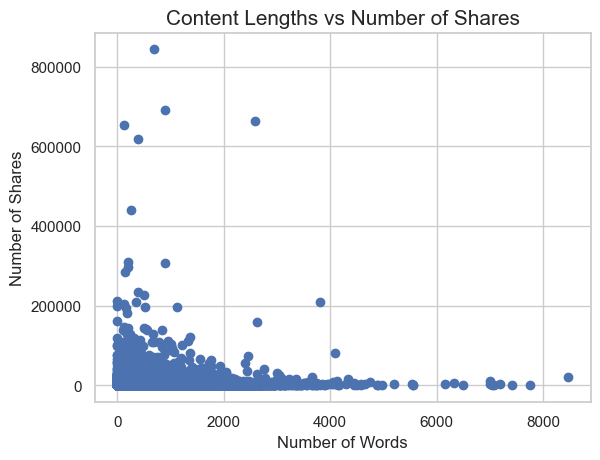

In [250]:
# number of words in the content vs number of shares
import matplotlib.pyplot as plt

plt.scatter(onlinenews["n_tokens_content"], onlinenews["shares"])
plt.title("Content Lengths vs Number of Shares", size=15)
plt.xlabel("Number of Words", size=12)
plt.ylabel("Number of Shares", size=12)
plt.show()

C:\Users\sanch\AppData\Local\Temp\ipykernel_52092\3412105753.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.scatterplot(y='shares', x='n_tokens_title', data=onlinenews,palette='muted')


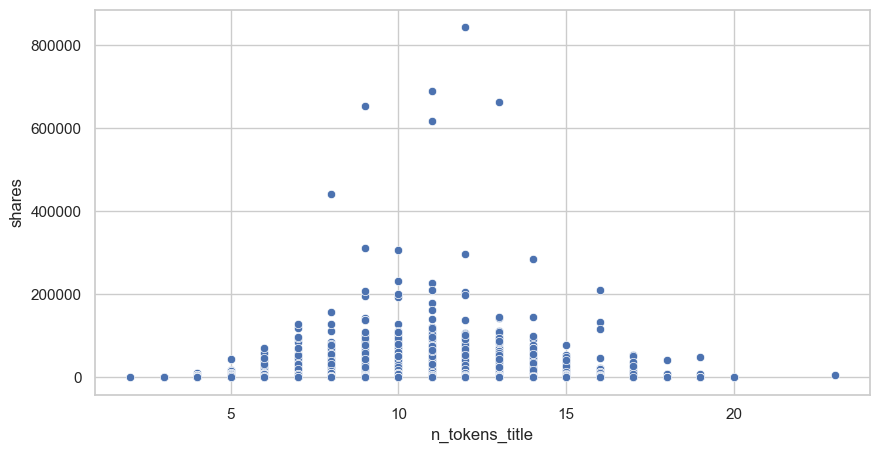

In [184]:
# Number of words in title vs Number of shares

plt.figure(figsize=(10,5))
ax = sns.scatterplot(y='shares', x='n_tokens_title', data=onlinenews,palette='muted')

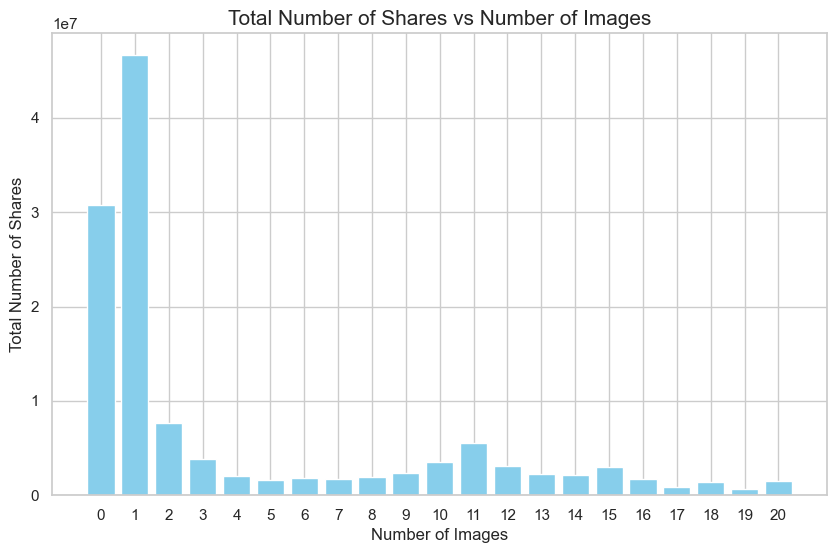

    num_videos    shares
0          0.0  72361946
1          1.0  39742700
2          2.0  10063313
3          3.0   1857869
4          4.0    854767
5          5.0    510251
6          6.0    533441
7          7.0    295222
8          8.0    271488
9          9.0    290131
10        10.0    779126


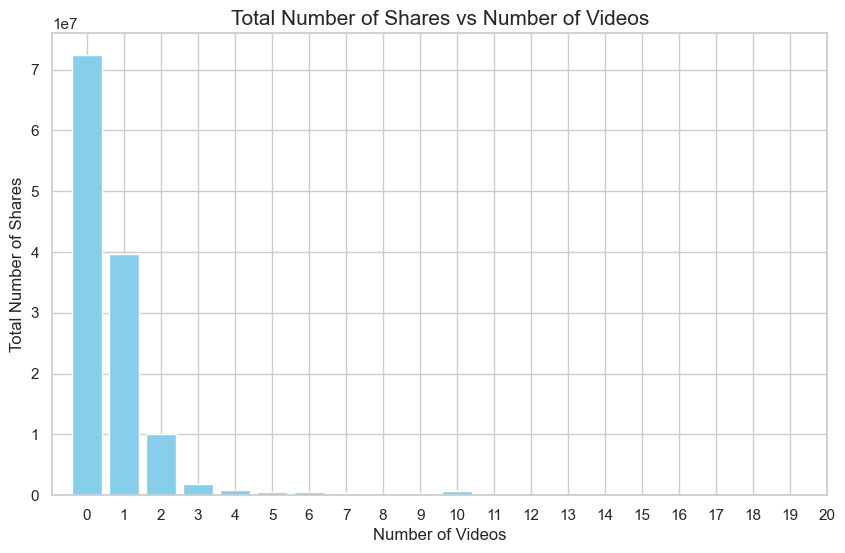

In [185]:

# Filter the data for the number of images from 0 to 20
data_subset = onlinenews[(onlinenews['num_imgs'] >= 0) & (onlinenews['num_imgs'] <= 20)]

# Group the data by the number of images and calculate the total number of shares
grouped_data = data_subset.groupby('num_imgs')['shares'].sum().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(grouped_data['num_imgs'], grouped_data['shares'], color='skyblue')
plt.title("Total Number of Shares vs Number of Images", size=15)
plt.xlabel("Number of Images", size=12)
plt.ylabel("Total Number of Shares", size=12)
plt.xticks(range(21))
plt.show()

# Filter the data for the number of videos from 0 to 20
data_subset = onlinenews[(onlinenews['num_videos'] >= 0) & (onlinenews['num_videos'] <= 10)]

# Group the data by the number of videos and calculate the average number of shares
grouped_data = data_subset.groupby('num_videos')['shares'].sum().reset_index()
print(grouped_data)
# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(grouped_data['num_videos'], grouped_data['shares'], color='skyblue')
plt.title("Total Number of Shares vs Number of Videos", size=15)
plt.xlabel("Number of Videos", size=12)
plt.ylabel("Total Number of Shares", size=12)
plt.xticks(range(21))
plt.show()



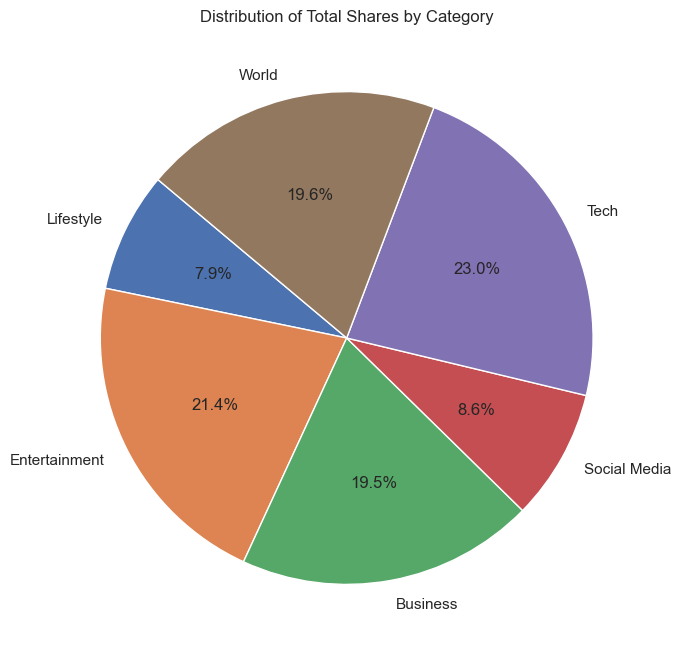

In [186]:
import matplotlib.pyplot as plt

# List of category column names
categories = ['Lifestyle', 'Entertainment', 'Business', 'Social Media', 'Tech', 'World']

# Calculate the total number of shares in each category
category_share_sums = [onlinenews[onlinenews[column] == 1]['shares'].sum() for column in ['data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world']]

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_share_sums, labels=categories, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Total Shares by Category")
plt.show()




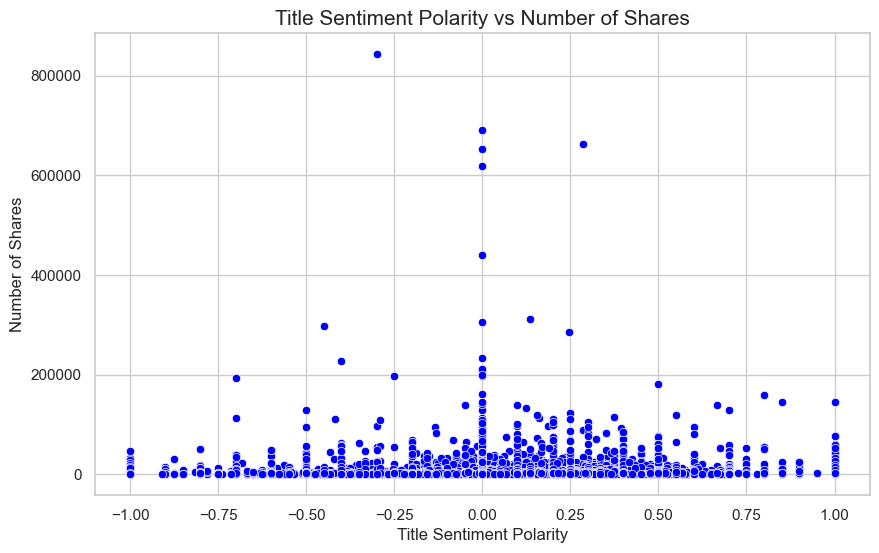

In [187]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='title_sentiment_polarity', y='shares', data=onlinenews, color='blue')
plt.title("Title Sentiment Polarity vs Number of Shares", size=15)
plt.xlabel("Title Sentiment Polarity", size=12)
plt.ylabel("Number of Shares", size=12)
plt.show()


##### Based on this EDA, we can make recommendations to our clients which can make there articles popular.

In [188]:
# remove noise from n_tokens_content. those equals to 0
onlinenews['shares'].quantile(q=[0, .2, .333, .4, .5, .60, .7, .8, .9,1.0])

0.000         1.0
0.200       870.6
0.333      1100.0
0.400      1200.0
0.500      1400.0
0.600      1800.0
0.700      2300.0
0.800      3400.0
0.900      6200.0
1.000    843300.0
Name: shares, dtype: float64

# So Making it a Multi-Classification Problem:
###### I am segmenting data into 3 classes where highest 20 percentiles shared articles 
###### are most popular and lowest 20 are least popular, which is also true in practical purposes.

<Axes: xlabel='bin_shares,labelbin_shares'>

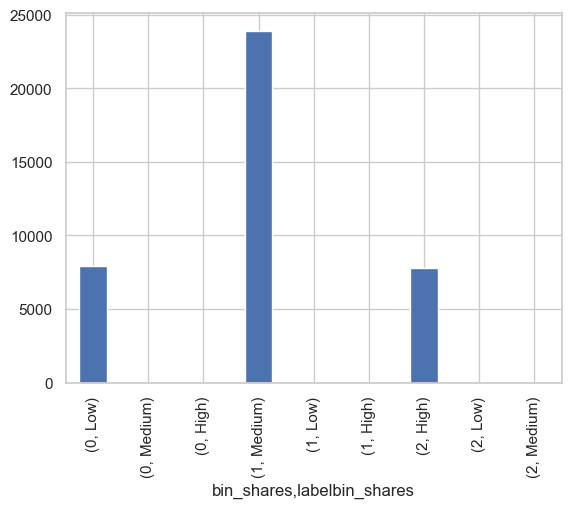

In [189]:
##20-60-20 segmentation

# Binning groups
onlinenews['labelbin_shares'] = pd.cut(onlinenews['shares'], 
                                bins=[0,870.6,3400,843300], 
                              labels=['Low','Medium','High'])

onlinenews['bin_shares'] = pd.cut(onlinenews['shares'], 
                           bins=[0,870.6,3400,843300], 
                           labels=[0,1,2])
# Visualization of Target Distribution
onlinenews['bin_shares'].value_counts()/onlinenews['labelbin_shares'].count()
onlinenews['labelbin_shares'].value_counts()
onlinenews.groupby('bin_shares').labelbin_shares.value_counts().plot.bar()
#Target Distribution

onlinenews.groupby('bin_shares').labelbin_shares.value_counts().plot.bar()

In [190]:

log_transformed_data['shares'].quantile(q=[0, .2, .333, .4, .5, .60, .7, .8, .9,1.0])

0.000     0.693147
0.200     6.770330
0.333     7.003974
0.400     7.090910
0.500     7.244942
0.600     7.496097
0.700     7.741099
0.800     8.131825
0.900     8.732466
1.000    13.645079
Name: shares, dtype: float64

<Axes: xlabel='bin_shares,labelbin_shares'>

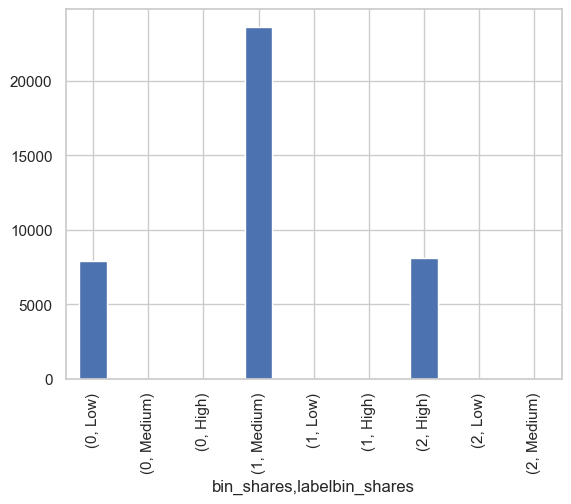

In [191]:
##20-60-20 segmentation

# Binning groups
log_transformed_data['labelbin_shares'] = pd.cut(log_transformed_data['shares'], 
                                bins=[0.69,6.77,8.13,13.65], 
                              labels=['Low','Medium','High'])

log_transformed_data['bin_shares'] = pd.cut(log_transformed_data['shares'], 
                           bins=[0.69,6.77,8.13,13.65],
                           labels=[0,1,2])
# Visualization of Target Distribution
log_transformed_data['bin_shares'].value_counts()/log_transformed_data['labelbin_shares'].count()
log_transformed_data['labelbin_shares'].value_counts()
log_transformed_data.groupby('bin_shares').labelbin_shares.value_counts().plot.bar()
#Target Distribution

log_transformed_data.groupby('bin_shares').labelbin_shares.value_counts().plot.bar()

### We use accuracy to evaluate the system since the task is multi classification problem. 
### The formula of accuracy is:
### Accuracy = TP + TN / TP + TN + FP + FN = 𝑛𝑢𝑚_𝑐𝑜𝑟𝑟𝑒𝑐𝑡_𝑝𝑟𝑒𝑑𝑖𝑐𝑡𝑖𝑜𝑛 /𝑛𝑢𝑚𝑧_𝑎𝑙𝑙_𝑠𝑎𝑚𝑝𝑙𝑒𝑠
### (TP: true positive, TN: True negative, FP: False positive, FN: False negative)

C:\Users\sanch\AppData\Local\Temp\ipykernel_52092\2028725247.py:17: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  legend.legendHandles[i].set_color(custom_palette[i])


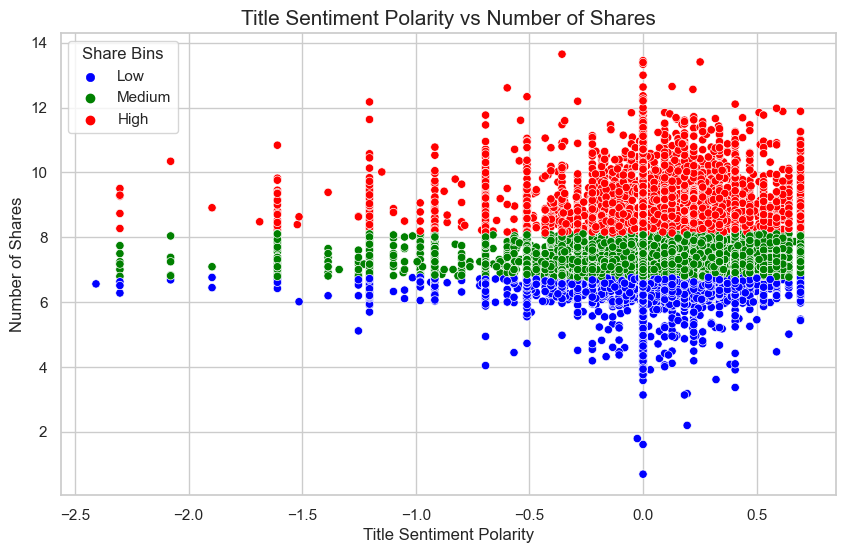

In [192]:
import seaborn as sns

# Define a custom color palette for the three classes (0, 1, 2)
custom_palette = {0: 'blue', 1: 'green', 2: 'red'}

# Create a scatter plot with custom colors and legends
plt.figure(figsize=(10, 6))
sns.scatterplot(x='title_sentiment_polarity', y='shares', data=log_transformed_data, hue='bin_shares', palette=custom_palette)
plt.title("Title Sentiment Polarity vs Number of Shares", size=15)
plt.xlabel("Title Sentiment Polarity", size=12)
plt.ylabel("Number of Shares", size=12)

# Add a legend

legend = plt.legend(title='Share Bins', labels=['Low', 'Medium', 'High'])
for i in range(3):
    legend.legendHandles[i].set_color(custom_palette[i])

plt.show()



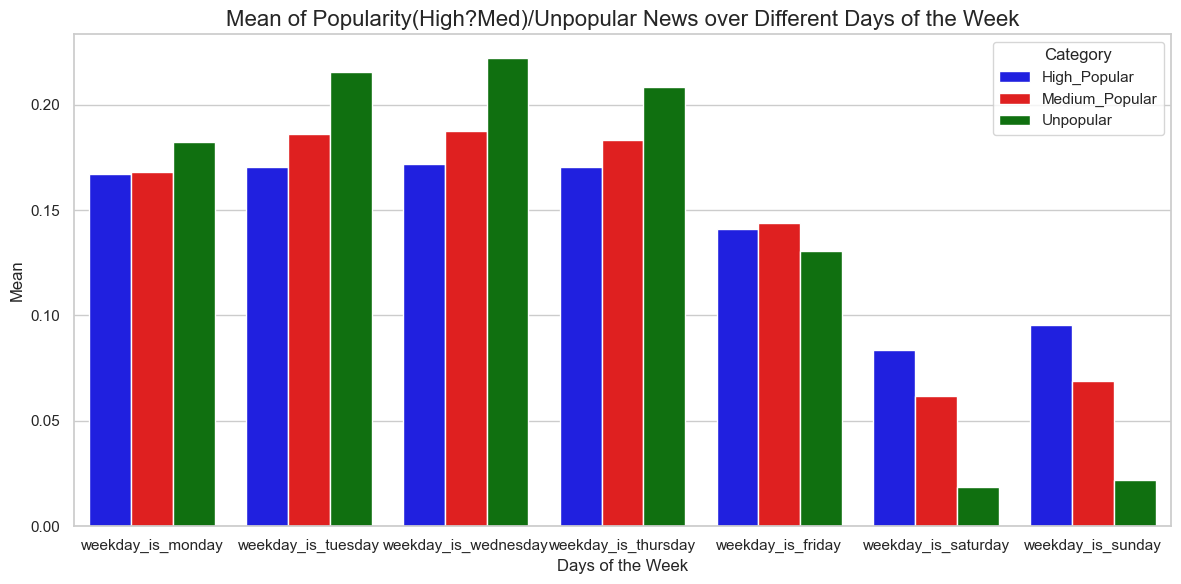

In [155]:

# Define the columns of interest
columns_day = onlinenews.columns.values[29:36]


#onlinenews['imp_url'] = onlinenews['shares'] > onlinenews['shares'].quantile(0.25)
quantile_33 = onlinenews['shares'].quantile(0.20)
quantile_66 = onlinenews['shares'].quantile(0.80)


# Create a new DataFrame for popular and unpopular articles
unpop = onlinenews[onlinenews['shares'] <= quantile_33]
medpop = onlinenews[(onlinenews['shares'] > quantile_33) & onlinenews['shares'] <= quantile_66]
highpop = onlinenews[onlinenews['shares'] > quantile_66]

# Compute the sum of each day for popular and unpopular articles
unpop_day = unpop[columns_day].mean()
medpop_day= medpop[columns_day].mean()
highpop_day= highpop[columns_day].mean()

# Create a new DataFrame to combine the data
day_data = pd.DataFrame({'Day of Week': columns_day,
                         'High_Popular': highpop_day,
                         'Medium_Popular': medpop_day,
                         'Unpopular': unpop_day})

# Melt the data for visualization
day_data_melted = day_data.melt(id_vars='Day of Week', var_name='Category', value_name='Count')

# Set the plotting style
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=day_data_melted, x='Day of Week', y='Count', hue='Category', palette=["blue", "red","green"])
plt.title("Mean of Popularity(High?Med)/Unpopular News over Different Days of the Week", fontsize=16)
plt.xlabel("Days of the Week", fontsize=12)
plt.ylabel("Mean", fontsize=12)
plt.legend(title="Category", title_fontsize="12")
plt.tight_layout()
plt.savefig("days.png")  # Save the plot as an image
plt.show()


### From the graph we can see that articles published on Saturday and Sunday  get more popular.


# Feature Engineering

In [193]:
#Univariate Selection. Select features according to the k highest scores using SelectKBest

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif


X = onlinenews.drop(columns=['labelbin_shares','shares','bin_shares'])
y = onlinenews['bin_shares']    


# Create an SelectKBest object to select features with two best ANOVA F-Values
fvalue_selector = SelectKBest(f_classif, k=21)

# Apply the SelectKBest object to the features and target
X_kbest = fvalue_selector.fit_transform(X, y)

print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_kbest.shape[1])
print('\n')

mask = fvalue_selector.get_support() #list of booleans
selectedFeatures = [] # The list of your K best features

for bool, feature in zip(mask, X.columns.values):
    if bool:
        selectedFeatures.append(feature)

print(selectedFeatures)



Original number of features: 58
Reduced number of features: 21


['num_hrefs', 'num_imgs', 'num_keywords', 'data_channel_is_entertainment', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess', 'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity']


In [575]:
#onlinenews[(onlinenews['bin_shares']!=0) & (onlinenews['bin_shares']!=1) & (onlinenews['bin_shares']!=2)]

# Dimensionality Reduction

<BarContainer object of 21 artists>

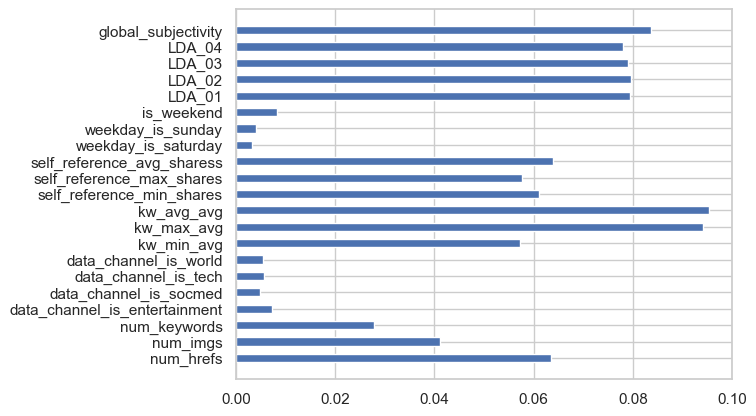

In [194]:
#Check feature importance using Random Forest
from sklearn import ensemble
X = onlinenews[selectedFeatures]
Y = onlinenews['bin_shares']  

rfc = ensemble.RandomForestClassifier(n_estimators=100)

#Fitting the model
rfc.fit(X,Y)

importantFeatures = {}
for feature,importance in zip(selectedFeatures,rfc.feature_importances_):
    importantFeatures[feature] = importance
    #print(feature,importance)

plt.barh(selectedFeatures,rfc.feature_importances_,height=.5)

In [195]:
toremove = ['data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world','data_channel_is_entertainment','weekday_is_saturday','weekday_is_sunday','is_weekend']
for remove in toremove:
    selectedFeatures.remove(remove)



In [197]:
X

num_hrefs  num_imgs  num_keywords   kw_min_avg   kw_max_avg  \
0            4.0       1.0           5.0     0.000000     0.000000   
1            3.0       1.0           4.0     0.000000     0.000000   
2            3.0       1.0           6.0     0.000000     0.000000   
3            9.0       1.0           7.0     0.000000     0.000000   
4           19.0      20.0           7.0     0.000000     0.000000   
...          ...       ...           ...          ...          ...   
39639        9.0       1.0           8.0  2514.742857  4004.342857   
39640        9.0       3.0           7.0  1664.267857  5470.168651   
39641       24.0      12.0           8.0  1753.882353  6880.687034   
39642       10.0       1.0           5.0     0.000000  3384.316871   
39643        1.0       0.0           4.0  3035.080555  3613.512953   

        kw_avg_avg  self_reference_min_shares  self_reference_max_shares  \
0         0.000000                      496.0                      496.0   
1         0.000000                        0.0                        0.0   
2         0.000000                      918.0                      918.0   
3         0.000000                        0.0                        0.0   
4         0.000000                      545.0                    16000.0   
...            ...                        ...                        ...   
39639  3031.115764                    11400.0                    48000.0   
39640  3411.660830                     2100.0                     2100.0   
39641  4206.439195                     1400.0                     1400.0   
39642  1777.895883                      452.0                      452.0   
39643  3296.909481                     2100.0                     2100.0   

       self_reference_avg_sharess    LDA_01    LDA_02    LDA_03    LDA_04  \
0                      496.000000  0.378279  0.040005  0.041263  0.040123   
1                        0.000000  0.050047  0.050096  0.050101  0.050001   
2                      918.000000  0.033334  0.033351  0.033334  0.682188   
3                        0.000000  0.419300  0.494651  0.028905  0.028572   
4                     3151.157895  0.028794  0.028575  0.028572  0.885427   
...                           ...       ...       ...       ...       ...   
39639                37033.333333  0.025001  0.151701  0.025000  0.773260   
39640                 2100.000000  0.028575  0.231866  0.681635  0.028575   
39641                 1400.000000  0.025025  0.025207  0.643794  0.146970   
39642                  452.000000  0.040003  0.839987  0.040002  0.040004   
39643                 2100.000000  0.799339  0.050000  0.050659  0.050001   

       global_subjectivity  
0                 0.521617  
1                 0.341246  
2                 0.702222  
3                 0.429850  
4                 0.513502  
...                    ...  
39639             0.482679  
39640             0.564374  
39641             0.510296  
39642             0.358578  
39643             0.517893  

[39644 rows x 14 columns]

# Model Deployment and making Predictions
##### Applied first model only after scaling the data

In [200]:
#import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X = onlinenews[selectedFeatures]
Y = onlinenews['bin_shares']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=10)

xgb = XGBClassifier(booster = 'gbtree', learning_rate = 0.1, max_depth = 5, n_estimators = 180)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

acc_xgb = accuracy_score(y_test, y_pred_xgb)
conf = confusion_matrix(y_test, y_pred_xgb)
clf_report = classification_report(y_test, y_pred_xgb)
score=xgb_classifier.score(X_train, y_train)

print("Training Score :" ,score)
print(f"Accuracy Score of XGB Boost Classifier is : {acc_xgb}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Training Score : 0.6232432432432432
Accuracy Score of XGB Boost Classifier is : 0.5986211535227846
Confusion Matrix : 
[[ 170 2236   39]
 [ 162 6724  225]
 [  20 2092  226]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.48      0.07      0.12      2445
           1       0.61      0.95      0.74      7111
           2       0.46      0.10      0.16      2338

    accuracy                           0.60     11894
   macro avg       0.52      0.37      0.34     11894
weighted avg       0.55      0.60      0.50     11894



# Tuning 

C:\Users\sanch\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [03:58:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\sanch\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [03:58:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\sanch\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [03:58:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\sanch\anaconda3\Lib\site-packages\xgboost\core.py

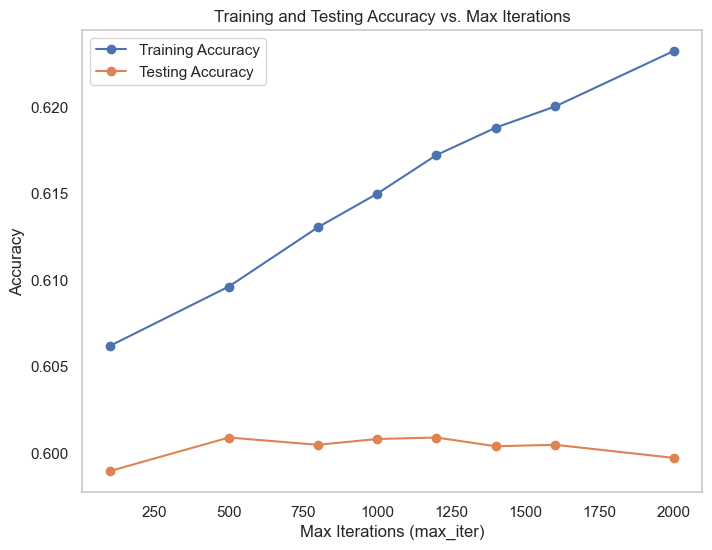

In [201]:
from xgboost import XGBClassifier

# Now you can use XGBClassifier in your code

# Define a range of max_iter values to test
max_iter_values = [100,500,800,1000,1200,1400,1600,2000]

# Lists to store training and testing accuracy for each max_iter
training_accuracy = []
testing_accuracy = []

X = onlinenews[selectedFeatures]
Y = onlinenews['bin_shares'] 

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=10)


for max_iter in max_iter_values:
    xgb_classifier = XGBClassifier(
    learning_rate=0.01,  # You can adjust the learning rate as needed
    n_estimators=max_iter,   # The number of boosting rounds (trees)
    max_depth=3,        # Maximum depth of each tree (adjust as needed)
    objective='multi:softprob',  # For multi-class classification
    num_class=3,        # Number of classes in your target variable
    gamma=0,            # Regularization parameter (tune if necessary)
    subsample=0.8,      # Fraction of samples used for growing trees
    colsample_bytree=0.8,  # Fraction of features used for growing trees
    random_state=10,     # Set a random seed for reproducibility) 
    class_weight={0:4, 1:1, 2:4}
    )

    xgb_classifier.fit(X_train, y_train)

    # Training accuracy
    train_score = xgb_classifier.score(X_train, y_train)
    training_accuracy.append(train_score)

    # Testing accuracy
    predictions = xgb_classifier.predict(X_test)
    test_score = metrics.accuracy_score(y_test, predictions)
    testing_accuracy.append(test_score)

# Plot the training and testing accuracy for different max_iter values
plt.figure(figsize=(8, 6))
plt.plot(max_iter_values, training_accuracy, marker='o', label='Training Accuracy')
plt.plot(max_iter_values, testing_accuracy, marker='o', label='Testing Accuracy')
plt.xlabel('Max Iterations (max_iter)')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy vs. Max Iterations')
plt.legend()
plt.grid()
plt.show()

#### So after even applying weight to Popular and Least Popular class, still accuracy is 59% , which is very low,
### Is Data the Issue? Lets Explore!

# Class Balancing

In [202]:
import imblearn
from collections import Counter
from imblearn.combine import SMOTEENN 


X = onlinenews[selectedFeatures]
y = onlinenews['bin_shares']    


#SMOTEENN, it's a method that combines over-sampling and under-sampling. 
#It's a class to perform over-sampling using SMOTE and cleaning using ENN.

sme = SMOTEENN(random_state=42)
X_res, y_res = sme.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({2: 13116, 0: 12962, 1: 4096})


# After Balancing Now applying optimized ML models
 
 ### Random Forest

In [207]:
# Random Forest 
from sklearn import ensemble
from sklearn.model_selection import train_test_split

X = X_res
Y = y_res

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

rfc = ensemble.RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=3000,
                       n_jobs=None, oob_score=False)

# Fitting the model
rfc.fit(X_train, y_train)

# Making predictions
predictionsrfc = rfc.predict(X_test)


In [209]:
score = rfc.score(X_train, y_train)
print("Testing Accuracy:" ,score)
accr_score = round(metrics.accuracy_score(y_test, predictionsrfc),4)
print('Accuracy Score Testing:{}'.format(accr_score))

Testing Accuracy: 1.0
Accuracy Score Testing:0.8241


## Massive Overfitting as per test score

In [71]:
from sklearn.model_selection import cross_val_score

# Create a Random Forest Classifier
rfc = ensemble.RandomForestClassifier(n_estimators=100, random_state=10)

# Perform 10 fold cross-validation and compute the cross-validation scores
cross_val_scores = cross_val_score(rfc, X_train, y_train, cv=10)  # You can adjust the number of folds (cv) as needed

# Display the cross-validation scores
print("Cross-Validation Scores:", cross_val_scores)
print("Mean CV Score:", np.mean(cross_val_scores))

# Check for overfitting
if np.mean(cross_val_scores) >= 0.90:  # You can adjust the threshold as needed
    print("The model might be overfitting.")
else:
    print("The model seems to be performing reasonably well.")


Cross-Validation Scores: [0.78052805 0.79785479 0.80445545 0.78052805 0.78052805 0.7879538
 0.80115512 0.79125413 0.80429397 0.78612717]
Mean CV Score: 0.7914678565296661
The model seems to be performing reasonably well.


# Hyperparameter Tuning

In [73]:
#Using GridSearch to find best parameters for Random Forest

from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators':[100,1000,5000],'min_samples_split':[2,8],'criterion':['gini','entropy']}

grid = GridSearchCV(ensemble.RandomForestClassifier(),param_grid, verbose=2)

grid.fit(X_train,y_train)

best_parameters = grid.best_params_

print(grid.best_estimator_)

grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print('\n')
print(classification_report(y_test,grid_predictions))


print(grid.best_estimator_)
print(best_parameters)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END criterion=gini, min_samples_split=2, n_estimators=100; total time=   6.9s
[CV] END criterion=gini, min_samples_split=2, n_estimators=100; total time=   5.5s
[CV] END criterion=gini, min_samples_split=2, n_estimators=100; total time=   4.9s
[CV] END criterion=gini, min_samples_split=2, n_estimators=100; total time=   4.9s
[CV] END criterion=gini, min_samples_split=2, n_estimators=100; total time=   4.9s
[CV] END criterion=gini, min_samples_split=2, n_estimators=1000; total time=  53.2s
[CV] END criterion=gini, min_samples_split=2, n_estimators=1000; total time=  54.0s
[CV] END criterion=gini, min_samples_split=2, n_estimators=1000; total time=  52.6s
[CV] END criterion=gini, min_samples_split=2, n_estimators=1000; total time=  53.8s
[CV] END criterion=gini, min_samples_split=2, n_estimators=1000; total time=  52.2s
[CV] END criterion=gini, min_samples_split=2, n_estimators=5000; total time= 4.7min
[CV] END criterion=g

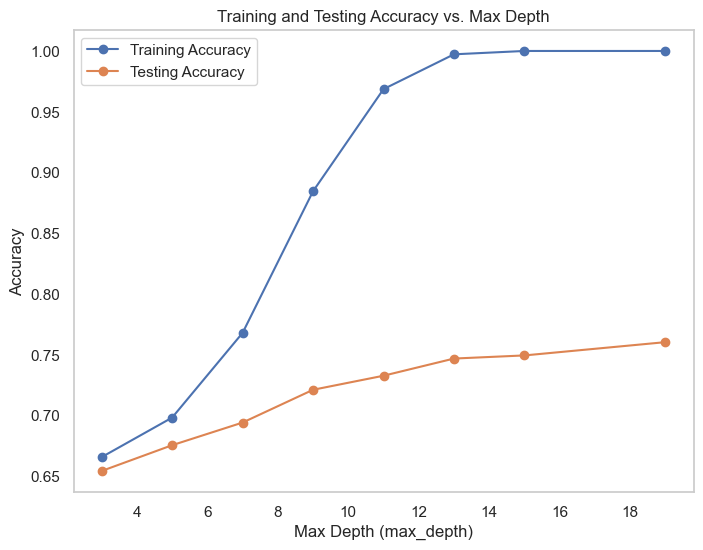

In [150]:
# Define a range of max_depth values to test
max_depth_values = [3,5,7,9,11,13,15,19]

# Lists to store training and testing accuracy for each max_iter
training_accuracy = []
testing_accuracy = []

X = X_res
Y = y_res

for max_depth in max_depth_values:
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 10)
    
    rfc = ensemble.RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=max_depth, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False)

# Fitting the model
    rfc.fit(X_train, y_train)


    # Training accuracy
    train_score = rfc.score(X_train, y_train)
    training_accuracy.append(train_score)

    # Testing accuracy
    predictions = rfc.predict(X_test)
    test_score = metrics.accuracy_score(y_test, predictions)
    testing_accuracy.append(test_score)

# Plot the training and testing accuracy for different max_iter values
plt.figure(figsize=(8, 6))
plt.plot(max_depth_values, training_accuracy, marker='o', label='Training Accuracy')
plt.plot(max_depth_values, testing_accuracy, marker='o', label='Testing Accuracy')
plt.xlabel('Max Depth (max_depth)')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy vs. Max Depth')
plt.legend()
plt.grid()
plt.show()

In [210]:
# Optimized Random Forest 

X = X_res
Y = y_res

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

rfc = ensemble.RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=7, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False)

# Fitting the model
rfc.fit(X_train, y_train)

# Making predictions
predictionsrfc = rfc.predict(X_test)

score = rfc.score(X_train, y_train)
print('Training Score' ,score)

accu_score = round(metrics.accuracy_score(y_test, predictionsrfc),4)
print('Accuracy of RF :' ,accu_score)


Training Score 0.7076369490080963
Accuracy of RF : 0.6989


In [212]:
from sklearn.metrics import classification_report,confusion_matrix
conf = confusion_matrix(y_test, predictionsrfc)
#clf_report = classification_report(y_test, predictionsrfc)


print(f"Accuracy Score of Random Forest is : {accu_score}")
print(f"Confusion Matrix : \n{conf}")

target_names = ['Low','Medium','High']
print(classification_report(y_test,predictionsrfc, target_names=target_names))
#print(f"Classification Report : \n{clf_report}")

Accuracy Score of Random Forest is : 0.6989
Confusion Matrix : 
[[3040    9  812]
 [ 719   27  489]
 [ 692    5 3260]]
              precision    recall  f1-score   support

         Low       0.68      0.79      0.73      3861
      Medium       0.66      0.02      0.04      1235
        High       0.71      0.82      0.77      3957

    accuracy                           0.70      9053
   macro avg       0.69      0.54      0.51      9053
weighted avg       0.69      0.70      0.65      9053



###### Summary:- Now the model appears to perform well for Class 1 and Class 3 but struggles with Class 2. The accuracy of 0.699 is decent, but if correctly identifying Class 2 instances is important,its not performing as expected.

###### Class 2 (precision, recall, and F1-score are relatively lower): The model performs less effectively for this class, with a precision of 0.66, but recall of 0.02, and an F1-score of 0.04. It has difficulty correctly identifying Class 2 instances.

##### We might need to consider strategies to improve its performance for this specific class, such as more data, feature engineering, or model hyperparameter tuning.

In [30]:
onlinenews['shares'].quantile(q=[0, .2, .333, .4, .5, .66, .7, .8, .9,1.0])

0.000         1.0
0.200       870.6
0.333      1100.0
0.400      1200.0
0.500      1400.0
0.660      2100.0
0.700      2300.0
0.800      3400.0
0.900      6200.0
1.000    843300.0
Name: shares, dtype: float64

# Trying Different Data Segmentation

<Axes: xlabel='bin_shares,labelbin_shares'>

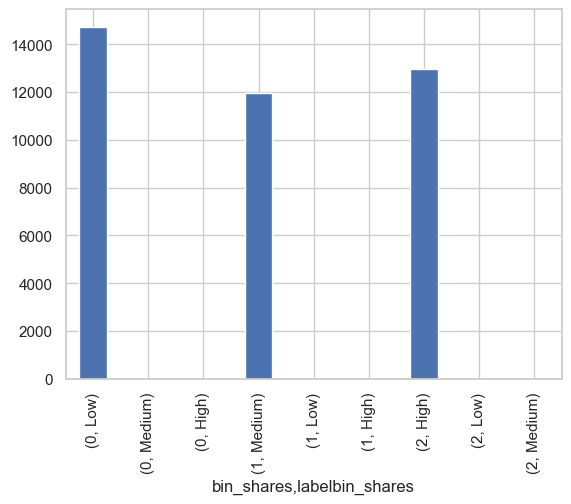

In [213]:
##33-33-33 segmentation

# Binning groups
new_df=onlinenews

new_df['labelbin_shares'] = pd.cut(new_df['shares'], 
                                bins=[0,1100,2100,843300], 
                              labels=['Low','Medium','High'])

new_df['bin_shares'] = pd.cut(new_df['shares'], 
                           bins=[0,1100,2100,843300], 
                           labels=[0,1,2])
# Visualization of Target Distribution
new_df['bin_shares'].value_counts()/new_df['labelbin_shares'].count()
new_df['labelbin_shares'].value_counts()
new_df.groupby('bin_shares').labelbin_shares.value_counts().plot.bar()
#Target Distribution

new_df.groupby('bin_shares').labelbin_shares.value_counts().plot.bar()

##### Data is much more balanced now as expected

In [253]:
new_df['shares'].head(20)

0       593
1       711
2      1500
3      1200
4       505
5       855
6       556
7       891
8      3600
9       710
10     2200
11     1900
12      823
13    10000
14      761
15     1600
16    13600
17     3100
18     5700
19    17100
Name: shares, dtype: int64

In [214]:
#Univariate Selection. Select features according to the k highest scores using SelectKBest

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif


X = new_df.drop(columns=['labelbin_shares','shares','bin_shares'])
y = new_df['bin_shares']    


# Create an SelectKBest object to select features with two best ANOVA F-Values
fvalue_selector = SelectKBest(f_classif, k=21)

# Apply the SelectKBest object to the features and target
X_kbest = fvalue_selector.fit_transform(X, y)

print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_kbest.shape[1])
print('\n')

mask = fvalue_selector.get_support() #list of booleans
selectedFeatures = [] # The list of K best features

for bool, feature in zip(mask, X.columns.values):
    if bool:
        selectedFeatures.append(feature)

print(selectedFeatures)


Original number of features: 58
Reduced number of features: 21


['num_hrefs', 'num_imgs', 'num_keywords', 'data_channel_is_entertainment', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_avg_sharess', 'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity', 'rate_negative_words']


<BarContainer object of 21 artists>

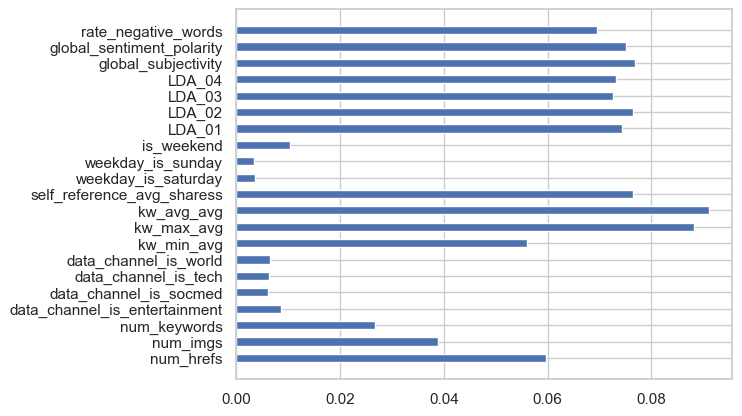

In [215]:
#Check feature importance using Random Forest
from sklearn import ensemble
X = new_df[selectedFeatures]
Y = new_df['bin_shares']  

rfc = ensemble.RandomForestClassifier(n_estimators=100)

#Fitting the model
rfc.fit(X,Y)

importantFeatures = {}
for feature,importance in zip(selectedFeatures,rfc.feature_importances_):
    importantFeatures[feature] = importance
    #print(feature,importance)

plt.barh(selectedFeatures,rfc.feature_importances_,height=.5)

In [216]:
toremove = ['data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world','data_channel_is_entertainment','weekday_is_saturday','weekday_is_sunday','is_weekend']
for remove in toremove:
    selectedFeatures.remove(remove)


In [217]:

X1= new_df[selectedFeatures]
y1= new_df['bin_shares']    


#SMOTEENN, it's a method that combines over-sampling and under-sampling. 
#It's a class to perform over-sampling using SMOTE and cleaning using ENN.

sme = SMOTEENN(random_state=42)
X_res1, y_res1 = sme.fit_resample(X1, y1)
print('Resampled dataset shape %s' % Counter(y_res1))

Resampled dataset shape Counter({2: 1960, 1: 1856, 0: 1473})


##### Again Doing Class Balancing and applyind ML models

## Random Forest--Optimized

In [233]:
# Optimized Random Forest 

X = X_res1
Y = y_res1

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

rfc = ensemble.RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=7, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False)

# Fitting the model
rfc.fit(X_train, y_train)

# Making predictions
predictionsrfc = rfc.predict(X_test)

score = rfc.score(X_train, y_train)
print('Training Score afterr .33 split in RF ' ,score)

accu_score = round(metrics.accuracy_score(y_test, predictionsrfc),4)
print('Accuracy after .33 split in RF ' ,accu_score)



Training Score afterr .33 split in RF  0.7698541329011345
Accuracy after .33 split in RF  0.6862


In [234]:
from sklearn.metrics import classification_report,confusion_matrix
conf = confusion_matrix(y_test, predictionsrfc)
#clf_report = classification_report(y_test, predictionsrfc)


print(f"Accuracy Score of Random Forest is : {accu_score}")
print(f"Confusion Matrix : \n{conf}")

target_names = ['Low','Medium','High']
print(classification_report(y_test,predictionsrfc, target_names=target_names))
#print(f"Classification Report : \n{clf_report}")

Accuracy Score of Random Forest is : 0.6862
Confusion Matrix : 
[[326 102  31]
 [105 297 156]
 [ 19  85 466]]
              precision    recall  f1-score   support

         Low       0.72      0.71      0.72       459
      Medium       0.61      0.53      0.57       558
        High       0.71      0.82      0.76       570

    accuracy                           0.69      1587
   macro avg       0.68      0.69      0.68      1587
weighted avg       0.68      0.69      0.68      1587



In [235]:
#Create a DataFrame for saving results from models
results = pd.DataFrame(columns = ['Model' , 'Model_score', 'Accuracy_score'])
results = results.append({'Model': 'Random Forest', 
                          'Model_score': score, 
                          'Accuracy_score': accu_score},ignore_index=True)

C:\Users\sanch\AppData\Local\Temp\ipykernel_52092\1214008927.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': 'Random Forest',


# Support Vector Classifier--SVC

In [236]:
from sklearn.svm import SVC

X = X_res1
Y = y_res1

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 10)

svc = SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=400, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

svc.fit(X_train,y_train)

predictions = svc.predict(X_test)


score = rfc.score(X_train, y_train)
print('Training Score for SVc : ' ,score)

accu_score = round(metrics.accuracy_score(y_test, predictions),4)
print('Accuracy for SVC : ' ,accu_score)


C:\Users\sanch\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Training Score for SVc :  0.7705334462320068
Accuracy for SVC :  0.7801


In [237]:
results = results.append({'Model': 'SVC', 
                          'Model_score': score, 
                          'Accuracy_score': accu_score},ignore_index=True)



C:\Users\sanch\AppData\Local\Temp\ipykernel_52092\223686414.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': 'SVC',


In [238]:
conf = confusion_matrix(y_test, predictions)
print(f"Accuracy Score of SVC is : {accu_score}")
print(f"Confusion Matrix : \n{conf}")

target_names = ['Low','Medium','High']
print(classification_report(y_test,predictions, target_names=target_names))
#print(f"Classification Report : \n{clf_report}"

Accuracy Score of SVC is : 0.7801
Confusion Matrix : 
[[413  62  31]
 [ 72 425 114]
 [ 26  79 524]]
              precision    recall  f1-score   support

         Low       0.81      0.82      0.81       506
      Medium       0.75      0.70      0.72       611
        High       0.78      0.83      0.81       629

    accuracy                           0.78      1746
   macro avg       0.78      0.78      0.78      1746
weighted avg       0.78      0.78      0.78      1746



# Hyperparameter Tuning

C:\Users\sanch\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\sanch\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\sanch\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\sanch\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=450).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\sanch\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).

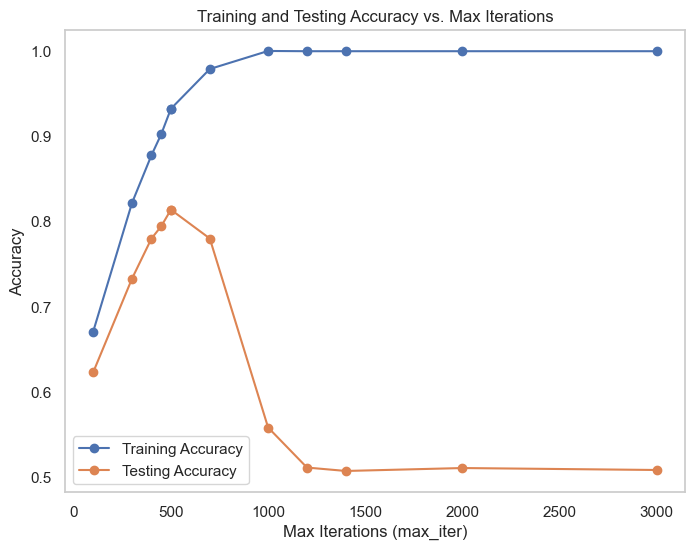

In [52]:
from sklearn.svm import SVC

# Define a range of max_iter values to test
max_iter_values = [100,300, 400,450, 500, 500, 700, 1000,1200,1400, 2000, 3000]

# Lists to store training and testing accuracy for each max_iter
training_accuracy = []
testing_accuracy = []

X = X_res1
Y = y_res1

for max_iter in max_iter_values:
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 10)
    
    svc = SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=max_iter, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
    
    svc.fit(X_train,y_train)

    # Training accuracy
    train_score = svc.score(X_train, y_train)
    training_accuracy.append(train_score)

    # Testing accuracy
    predictions = svc.predict(X_test)
    test_score = metrics.accuracy_score(y_test, predictions)
    testing_accuracy.append(test_score)

# Plot the training and testing accuracy for different max_iter values
plt.figure(figsize=(8, 6))
plt.plot(max_iter_values, training_accuracy, marker='o', label='Training Accuracy')
plt.plot(max_iter_values, testing_accuracy, marker='o', label='Testing Accuracy')
plt.xlabel('Max Iterations (max_iter)')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy vs. Max Iterations')
plt.legend()
plt.grid()
plt.show()

# Optimized XG-Boost

In [239]:
#import xgboost as xgb
#from xgboost import XGBClassifier



X = X_res1
Y = y_res1

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=10)

xgb_classifier = XGBClassifier(
    learning_rate=0.01,  # You can adjust the learning rate as needed
    n_estimators=400,   # The number of boosting rounds (trees)
    max_depth=3,        # Maximum depth of each tree (adjust as needed)
    objective='multi:softprob',  # For multi-class classification
    num_class=3,        # Number of classes in your target variable
    gamma=0.1,            # Regularization parameter (tune if necessary)
    subsample=0.8,      # Fraction of samples used for growing trees
    colsample_bytree=0.8,  # Fraction of features used for growing trees
    random_state=10     # Set a random seed for reproducibility
)

xgb_classifier.fit(X_train, y_train)

predictions = xgb_classifier.predict(X_test)


score = xgb_classifier.score(X_train, y_train)
print(score)

accu_score = round(metrics.accuracy_score(y_test, predictions), 4)
print(accu_score)


0.7071853052404106
0.6793


In [240]:
results = results.append({'Model': 'XGB', 
                          'Model_score': score, 
                          'Accuracy_score': accu_score},ignore_index=True)

C:\Users\sanch\AppData\Local\Temp\ipykernel_52092\3470876921.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': 'XGB',


In [242]:
conf = confusion_matrix(y_test, predictions)
print(f"Accuracy Score of SVC is : {accu_score}")
print(f"Confusion Matrix : \n{conf}")

target_names = ['Low','Medium','High']
print(classification_report(y_test,predictions, target_names=target_names))
#print(f"Classification Report : \n{clf_report}"

Accuracy Score of SVC is : 0.6793
Confusion Matrix : 
[[353  80  26]
 [111 277 170]
 [ 23  99 448]]
              precision    recall  f1-score   support

         Low       0.72      0.77      0.75       459
      Medium       0.61      0.50      0.55       558
        High       0.70      0.79      0.74       570

    accuracy                           0.68      1587
   macro avg       0.68      0.68      0.68      1587
weighted avg       0.67      0.68      0.67      1587



In [243]:
results

Model  Model_score  Accuracy_score
0  Random Forest     0.769854          0.6862
1            SVC     0.770533          0.7801
2            XGB     0.707185          0.6793

# Comparing Models Score on new Segmented Data

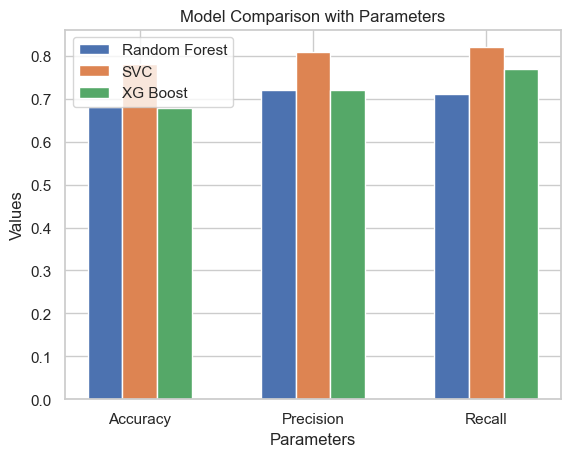

In [249]:
import matplotlib.pyplot as plt
import numpy as np
 
# Define the models and their parameters
models = ['Random Forest', 'SVC', 'XG Boost']
parameters = ['Accuracy', 'Precision', 'Recall']
values = np.array([[0.68,0.72,0.71],[0.78,0.81,0.82],[0.679,0.72,0.77]])  # Example random values, replace with actual data
 
# Define the positions for the bars
x = np.arange(len(models))
 
# Set the width of the bars
bar_width = 0.2
 
# Create the figure and the axes
fig, ax = plt.subplots()
 
# Plot the grouped bars for each model and parameter
for i, model in enumerate(models):
    ax.bar(x + i*bar_width, values[i], bar_width, label=model)
 
# Add some text for labels, title and custom x-axis tick labels
ax.set_xlabel('Parameters')
ax.set_ylabel('Values')
ax.set_title('Model Comparison with Parameters')
ax.set_xticks(x + bar_width)
ax.set_xticklabels(parameters)
ax.legend()
 
# Show the plot
plt.show()

## SVC is best working model here, and also we are able to precict each class effectively here, but still max accuracy is 77%,
## So we need to explore More and do more Feature Engineeirng, or the Data ain't good yet to preict article popularity

#### Can we do Semantic Analysis:?? Let's try

In [255]:
#Loading data
onlinenews = pd.read_csv("C:/Users/sanch/Downloads/online+news+popularity (1)/OnlineNewsPopularity/OnlineNewsPopularity.csv")


for col in onlinenews.columns:
    onlinenews.rename(columns={col:col.replace(" ", "")},inplace=True)


onlinenews.head(20)

url  timedelta  \
0   http://mashable.com/2013/01/07/amazon-instant-...      731.0   
1   http://mashable.com/2013/01/07/ap-samsung-spon...      731.0   
2   http://mashable.com/2013/01/07/apple-40-billio...      731.0   
3   http://mashable.com/2013/01/07/astronaut-notre...      731.0   
4    http://mashable.com/2013/01/07/att-u-verse-apps/      731.0   
5    http://mashable.com/2013/01/07/beewi-smart-toys/      731.0   
6   http://mashable.com/2013/01/07/bodymedia-armba...      731.0   
7    http://mashable.com/2013/01/07/canon-poweshot-n/      731.0   
8   http://mashable.com/2013/01/07/car-of-the-futu...      731.0   
9   http://mashable.com/2013/01/07/chuck-hagel-web...      731.0   
10  http://mashable.com/2013/01/07/cosmic-events-d...      731.0   
11   http://mashable.com/2013/01/07/crayon-creatures/      731.0   
12      http://mashable.com/2013/01/07/creature-cups/      731.0   
13          http://mashable.com/2013/01/07/dad-jokes/      731.0   
14  http://mashable.com/2013/01/07/downton-abbey-t...      731.0   
15  http://mashable.com/2013/01/07/earth-size-plan...      731.0   
16          http://mashable.com/2013/01/07/echo-game/      731.0   
17  http://mashable.com/2013/01/07/entrepreneur-tr...      731.0   
18  http://mashable.com/2013/01/07/facebook-sick-app/      731.0   
19  http://mashable.com/2013/01/07/felt-audio-puls...      731.0   

    n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0             12.0             219.0         0.663594               1.0   
1              9.0             255.0         0.604743               1.0   
2              9.0             211.0         0.575130               1.0   
3              9.0             531.0         0.503788               1.0   
4             13.0            1072.0         0.415646               1.0   
5             10.0             370.0         0.559889               1.0   
6              8.0             960.0         0.418163               1.0   
7             12.0             989.0         0.433574               1.0   
8             11.0              97.0         0.670103               1.0   
9             10.0             231.0         0.636364               1.0   
10             9.0            1248.0         0.490050               1.0   
11            10.0             187.0         0.666667               1.0   
12             9.0             274.0         0.609195               1.0   
13             9.0             285.0         0.744186               1.0   
14             8.0             259.0         0.562753               1.0   
15            12.0             682.0         0.459542               1.0   
16             8.0            1118.0         0.512397               1.0   
17             8.0             397.0         0.624679               1.0   
18            11.0             103.0         0.689320               1.0   
19             8.0            1207.0         0.410579               1.0   

    n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  ...  \
0                   0.815385        4.0             2.0       1.0  ...   
1                   0.791946        3.0             1.0       1.0  ...   
2                   0.663866        3.0             1.0       1.0  ...   
3                   0.665635        9.0             0.0       1.0  ...   
4                   0.540890       19.0            19.0      20.0  ...   
5                   0.698198        2.0             2.0       0.0  ...   
6                   0.549834       21.0            20.0      20.0  ...   
7                   0.572108       20.0            20.0      20.0  ...   
8                   0.836735        2.0             0.0       0.0  ...   
9                   0.797101        4.0             1.0       1.0  ...   
10                  0.731638       11.0             0.0       1.0  ...   
11                  0.800000        7.0             0.0       1.0  ...   
12                  0.707602       18.0             2.0      11.0  ...   
13       

### So we won't drop URL feature now, but will try to get some information out of it,


# Let's find TOP 50 words which appear repeeatedly in most popular articles.

In [261]:
#We will ignore the least 25% articles
#onlinenews['imp_url'] = onlinenews['shares'] > onlinenews['shares'].quantile(0.25)
quantile_25 = onlinenews['shares'].quantile(0.25)

# Create a modified DataFrame with the condition
onlinenews_q = onlinenews[onlinenews['shares'] > quantile_25]
onlinenews_q.head(5)

url  timedelta  \
2   http://mashable.com/2013/01/07/apple-40-billio...      731.0   
3   http://mashable.com/2013/01/07/astronaut-notre...      731.0   
8   http://mashable.com/2013/01/07/car-of-the-futu...      731.0   
10  http://mashable.com/2013/01/07/cosmic-events-d...      731.0   
11   http://mashable.com/2013/01/07/crayon-creatures/      731.0   

    n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
2              9.0             211.0         0.575130               1.0   
3              9.0             531.0         0.503788               1.0   
8             11.0              97.0         0.670103               1.0   
10             9.0            1248.0         0.490050               1.0   
11            10.0             187.0         0.666667               1.0   

    n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  ...  \
2                   0.663866        3.0             1.0       1.0  ...   
3                   0.665635        9.0             0.0       1.0  ...   
8                   0.836735        2.0             0.0       0.0  ...   
10                  0.731638       11.0             0.0       1.0  ...   
11                  0.800000        7.0             0.0       1.0  ...   

    min_positive_polarity  max_positive_polarity  avg_negative_polarity  \
2                0.100000                    1.0              -0.466667   
3                0.136364                    0.8              -0.369697   
8                0.400000                    0.8              -0.125000   
10               0.100000                    1.0              -0.415064   
11               0.200000                    0.7              -0.262500   

    min_negative_polarity  max_negative_polarity  title_subjectivity  \
2                  -0.800              -0.133333               0.000   
3                  -0.600              -0.166667               0.000   
8                  -0.125              -0.125000               0.125   
10                 -1.000              -0.100000               0.000   
11                 -0.400              -0.125000               0.000   

    title_sentiment_polarity  abs_title_subjectivity  \
2                        0.0                   0.500   
3                        0.0                   0.500   
8                        0.0                   0.375   
10                       0.0                   0.500   
11                       0.0                   0.500   

    abs_title_sentiment_polarity  shares  
2                            0.0    1500  
3                            0.0    1200  
8                            0.0    3600  
10                           0.0    2200  
11                           0.0    1900  

[5 rows x 61 columns]

In [257]:
# Extract the second last string from each URL --- i.e It contains the article heading
onlinenews_q['last_string'] = onlinenews_q['url'].str.split('/').str[-2]

# Display the last string for the first URL
print(onlinenews_q['last_string'])



2                           apple-40-billion-app-downloads
3                                 astronaut-notre-dame-bcs
8                            car-of-the-future-infographic
10                                  cosmic-events-doomsday
11                                        crayon-creatures
                               ...                        
39639                                   samsung-app-autism
39640    seth-rogen-james-franco-will-live-tweet-the-in...
39641                                son-pays-off-mortgage
39642                                       ukraine-blasts
39643                                youtube-channels-2015
Name: last_string, Length: 29714, dtype: object


C:\Users\sanch\AppData\Local\Temp\ipykernel_52092\2880367575.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  onlinenews_q['last_string'] = onlinenews_q['url'].str.split('/').str[-2]


In [258]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Initialize NLTK stopwords
nltk_stopwords = set(stopwords.words("english"))


# Initialize a list to store filtered strings
filtered_strings = []

# Iterate through the list of strings and preprocess each one
for text in onlinenews_q['last_string']:
    # Tokenize the string into words
    words = text.split('-')

    # Remove stopwords from the list of words
    filtered_words = [word for word in words if word.lower() not in nltk_stopwords]

    # Reconstruct the filtered string
    filtered_text = " ".join(filtered_words)

    # Append the filtered string to the list
    filtered_strings.append(filtered_text)

# Print the filtered strings
filtered_strings

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sanch\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['apple 40 billion app downloads',
 'astronaut notre dame bcs',
 'car future infographic',
 'cosmic events doomsday',
 'crayon creatures',
 'dad jokes',
 'earth size planets milky way',
 'echo game',
 'entrepreneur trends 2013',
 'facebook sick app',
 'felt audio pulse speaker',
 'ford glympse',
 'hillary clinton helmet',
 'iheartradio app perfect',
 'intel awesome laptop',
 'land job spotify',
 'lego taking robotics next level mindstorms ev3',
 'living room pinterest contest',
 'magisto ces',
 'man instagram images blind',
 'messi year goals',
 'monster ea gaming headphones',
 'nectar mobile powe',
 'nvidia project shield',
 'nvidia tegra 4',
 'one directions kiss video barrage web teasers',
 'pantech discover att',
 'papertab',
 'pitchfork advance album stream',
 'polaroid android camera',
 'power matters alliance organization',
 'rage comics dying',
 'reeddit reddit',
 'sharp intros worlds largest led hdtv',
 'social media iran',
 'social tv movies getglue 2012',
 'stolen iphone dat

In [259]:
# Reset the index to default integer index
onlinenews.reset_index(drop=True, inplace=True)

# Create a dictionary to store word shares
word_shares = {}

# Tokenize the strings and calculate word shares
for i, string in enumerate(filtered_strings):
    words = string.split('-')
    for word in words:
        word = word.lower()  # Convert to lowercase for case-insensitivity
        if word not in word_shares:
            word_shares[word] = 0
        word_shares[word] += onlinenews['shares'][i]



''' word_shares----------
{'car future infographic': 3600,
 'dad jokes': 10000,
 'echo game': 13600,
 'facebook sick app': 3100,
 'felt audio pulse speaker': 5700,'''

word_shares_dict = {}

# Iterate through the dictionary and accumulate word shares
for word, shares in word_shares.items():
    words = word.split(' ')
    for single_word in words:
        single_word = single_word.lower()
        if single_word not in word_shares_dict:
            word_shares_dict[single_word] = 0
        word_shares_dict[single_word] += shares

# Sort the dictionary by share values in descending order
sorted_word_shares = dict(sorted(word_shares_dict.items(), key=lambda item: item[1], reverse=True))

# Select the top 50 words
top_100_words = list(sorted_word_shares.keys())[:50]

# Display the top 50 words
print("Top 100 words with maximum corresponding shares:")
print(top_100_words)

Top 100 words with maximum corresponding shares:
['google', 'facebook', 'twitter', 'video', 'apple', 'new', '2', 'world', 'app', 'social', 'day', 'trailer', 'iphone', '2014', 'travel', 'samsung', 'media', 'game', 'map', 'comic', 'cup', 'ad', 'review', 'small', 'tv', 'photos', 'food', 'apps', 'tech', 'massage', 'stress', 'clothes', 'amazon', '3d', 'music', 'obama', 'vine', 'mobile', 'microsoft', 'ukraine', 'make', 'internet', 'android', 'best', 'time', 'keyboard', 'instagram', 'boycott', 'progressives', 'star']


## So i got the result and this way we can make some recommendations or even make features out of them to increase our rate of predictions,for that we will try it sometime Later!

# END!!!